In [1]:
import gym
import torch
import gym_nav
import numpy as np

import sys
sys.path.append('../')
from evaluation import *
from model_evaluation import *
from trajectories import *
%run ../evaluation 

from tqdm import tqdm
import itertools

In [2]:
env_kwargs = {'num_objects': 0, 'rew_structure': 'goal',
              'task_structure': 3, 'wall_colors': 4, 'num_rays': 12, 'fov': 1,
              'character_reset_pos': 1,  'one_hot_obs': True, 
              'turn_speed': 0.5, 'move_speed': 15, 'max_steps': 500}
env = gym.make('NavEnv-v0', **env_kwargs)

In [2]:
env_kwargs = {'give_last_action': True}
env = gym.make('ExploreNav-v0', **env_kwargs)

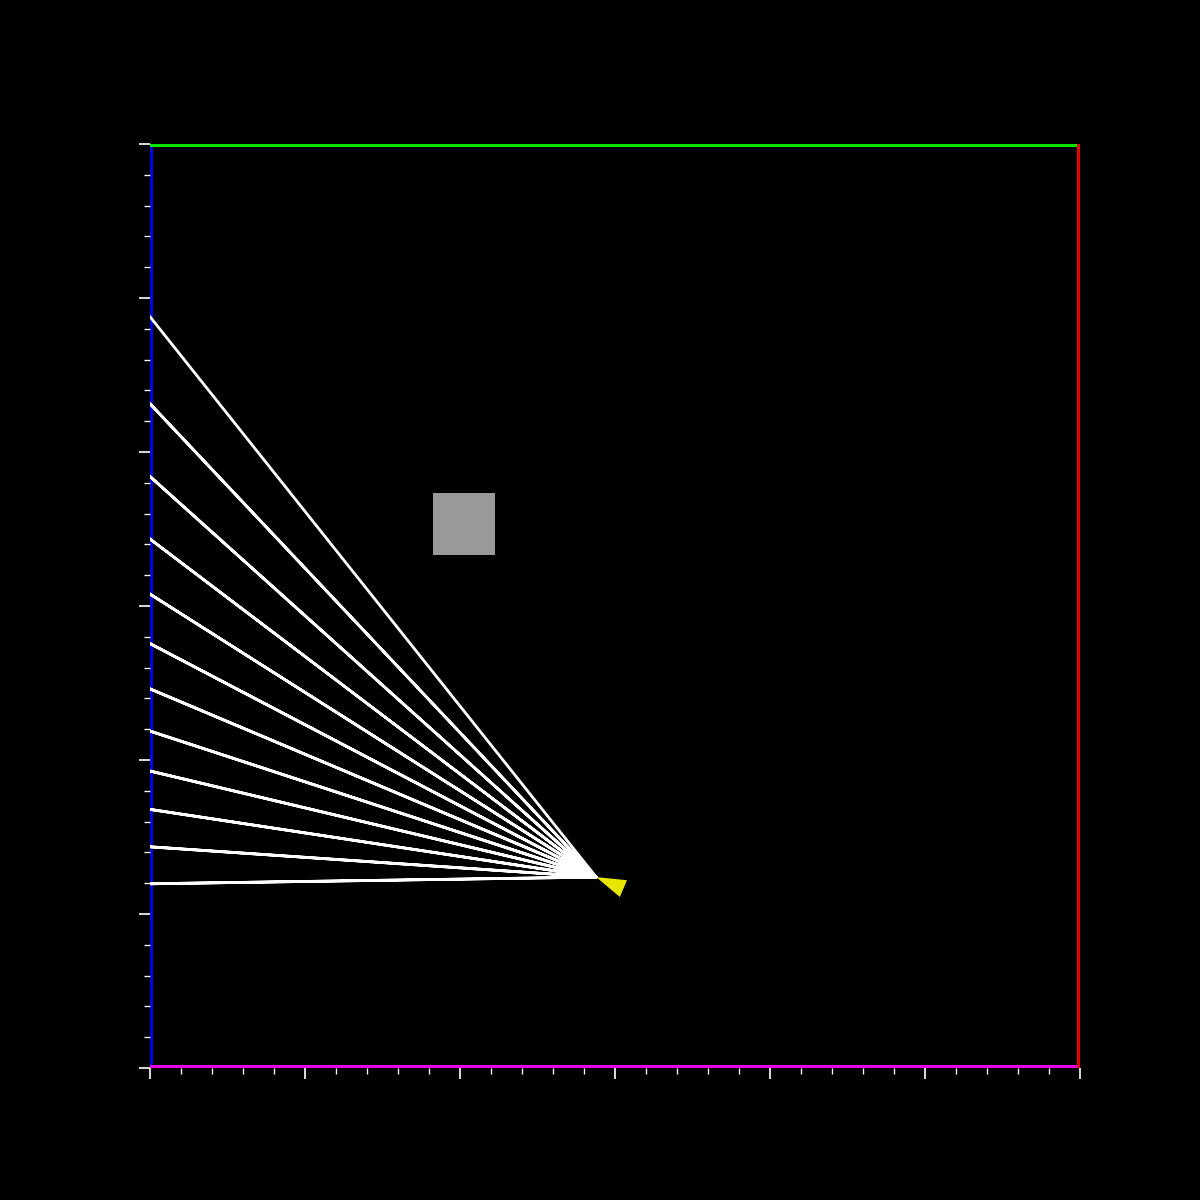

[0.         0.         0.         1.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.54298009 0.49283426 0.45405248 0.42365486 0.39967178 0.38075963
 0.36598173 0.35467773 0.34638312 0.3407787  0.33765894 0.33691288
 0.         0.         0.         0.         0.        ]


In [3]:
obs = env.reset()
env.render('human')
print(obs)

0.8159892941471947
(array([0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.5036329 ,

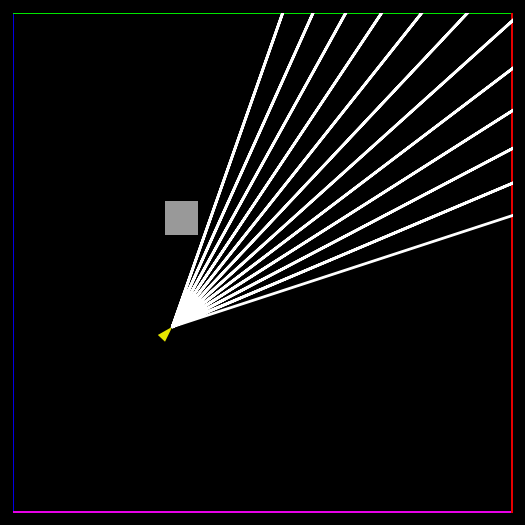

In [29]:
fig, ax = pplt.subplots()
print(env.character.angle)
obs = env.step(1)
env.render('human', ax=ax)
# print(env.character.angle)
print(obs)

ax.format(xlim=[0, 300], ylim=[0, 300])

In [30]:
env.reset()

array([0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.42411504, 0.46039775, 0.50731

In [15]:
env_kwargs = {'num_objects': 0, 'rew_structure': 'goal',
              'task_structure': 3, 'wall_colors': 4, 'num_rays': 12, 'fov': 1,
              'character_reset_pos': 1,  'one_hot_obs': True}

env_kwargs = {'num_objects': 0, 'rew_structure': 'explore',
              'task_structure': 3, 'wall_colors': 4, 'num_rays': 12, 'fov': 1,
              'character_reset_pos': 1,  'one_hot_obs': True,
              'turn_speed': 0.5, 'move_speed': 10, 'max_steps': 500}

env_kwargs = {'num_objects': 0, 'rew_structure': 'explorepunish2', 'sub_goal_reward': 0.02,
              'task_structure': 3, 'wall_colors': 4, 'num_rays': 12, 'fov': 1,
              'character_reset_pos': 1,  'one_hot_obs': True,
              'turn_speed': 0.5, 'move_speed': 10, 'max_steps': 500}

# model, obs_rms = torch.load('../trained_models/ppo/nav_4wallexplore/nav_4wallexplore_batch128onehot_t0.pt')
# model, obs_rms = torch.load('../saved_models/4wallexplore/nav_4wallexplore_batch128faster20m_t1.pt')
# model, obs_rms = torch.load('../saved_models/4we_aux/nav_4wallexplore_batch128faster20mrewexplore_t0.pt')
# model, obs_rms = torch.load('../saved_models/4we_aux/nav_4wallexplore_batch128explorepunish_t0.pt')
# model, obs_rms = torch.load('../saved_models/4we_punish/nav_4wallexplore_ep0.1_t2.pt')
model, obs_rms = torch.load('../saved_models/4we_punish/nav_4wallexplore_2ep0.05_t0.pt')
# model, obs_rms = torch.load('../saved_models/4wefc_punish/nav_4wefc_2ep0.01_t0.pt')

res = evaluate(model, obs_rms, env_kwargs=env_kwargs, num_episodes=5, data_callback=nav_data_callback,
              verbose=2)

C:\Users\14and\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\14and\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ep 0, rew tensor([[0.]])
ep 1, rew tensor([[0.]])
ep 2, rew tensor([[0.]])
ep 3, rew tensor([[0.]])
ep 4, rew tensor([[0.]])
 Evaluation using 0 episodes: mean reward nan



C:\Users\14and\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\14and\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Quantifying performance on explore task
Quantify by

* Search efficiency (how much space is covered in a platform reset based on number of steps in the reset)
* Memory effectiveness (are subsequent resets better able to recall where the platform was seen?)

In [2]:
def split_by_rew(targets_to_split, rews):
    '''
    Used to find when in an explore task the goal was reached based on
    when reward was earned. 

    For example, 
    res = evalu(...)
    ep_pos = split_by_ep(res['data']['pos'], res['rewards'])
    '''
    split_idxs = np.where(np.vstack(rews == 1))[0] + 1
    
    # if nothing to split
    if len(split_idxs) == 0:
        return [targets_to_split]

    split_targets = []
    for i in range(len(split_idxs)):
        if i == 0:
            done_targets = targets_to_split[:split_idxs[i]]
        else:
            done_targets = targets_to_split[split_idxs[i-1]:split_idxs[i]]
        split_targets.append(done_targets)
        
    if split_idxs[-1] != len(rews):
        split_targets.append(targets_to_split[split_idxs[-1]:])
        
    return split_targets


def compute_search_efficiency(pos, covered_distance=10):
    '''
    Compute search efficiency based on how many spots agent managed to get close to
    
    covered_distance: how close the agent had to get to a point to count as covered
        this should probably related to speed agent moves and goal size?
    '''
    
    test_points = np.stack(np.meshgrid(np.linspace(0, 300, 301), np.linspace(0, 300, 301))).reshape(2, -1).T
    unique_pos = np.unique(pos, axis=0)
    
    dists = []
    for p in unique_pos:
        dists.append(np.sqrt(np.sum((test_points - p) ** 2, axis=1)))
    min_dists = np.vstack(dists).min(axis=0)
    
    color_points = np.full(test_points.shape, False)
    color_points[min_dists < 10] = True
    color_points = color_points.all(axis=1).reshape(301, 301) #this can be plt.imshow'd to see what counts as visited
    num_covered_points = color_points.sum()
    
    total_points = 301*301
    cover_efficiency = num_covered_points / total_points / pos.shape[0]
    
    return cover_efficiency
    
    
def compute_eps_search_efficiency(all_pos, all_rew, ret_trials=False):
    '''
    Compute the mean and std search efficiency of an agent across multiple episodes
    Note we are assuming that all_pos and all_rew are already split by episode which
        they should be coming from an evaluate() call
        
    ret_trials: return individual values rather than mean and std, for example for boxplots    
    
    Ex. 
    res = evaluate(model, obs_rms, env_kwargs=env_kwargs, num_episodes=5, data_callback=nav_data_callback)
    compute_eps_search_efficiency(res['data']['pos'], res['rewards']
    '''
    
    explore_efficiencies = []

    for ep in range(len(all_rew)):
        rew = all_rew[ep]
        pos = all_pos[ep]

        split_pos = split_by_rew(pos, rew)
        split_rew = split_by_rew(rew, rew)

        for p in split_pos:
            explore_efficiencies.append(compute_search_efficiency(p))
            
    mean_eff = np.mean(explore_efficiencies)
    std_eff = np.std(explore_efficiencies)
    
    if ret_trials:
        return explore_efficiencies
    else:
        return mean_eff, std_eff
    
    
def test_search_efficiency(model, obs_rms, test_set=2, env_kwargs={}, ret_res=False,
                          manual_starts=None):
    '''
    Test an agent's exploring efficiency given fixed starting points
    
    env_kwargs: extra arguments to give
    manual_starts: option to pass [reset_points, reset_angles] to use manually
    '''
    if test_set == 0:
        reset_points = [np.array([150., 150.])]
        reset_angles = [np.pi/2]
    
    elif test_set == 1:
        reset_points = [np.array([150., 150.]),
                        np.array([10., 290.])]
        reset_angles = [np.pi/2,
                        0.]
    
    elif test_set == 2:
        reset_points = [np.array([150., 150.]),
                        np.array([10., 290.]),
                        np.array([290., 290.]),
                        np.array([290., 10.]),
                        np.array([10., 10.])]
        reset_angles = [np.pi/2,
                        0.,
                        -np.pi/2,
                        np.pi/2,
                        0.]
        
    if manual_starts is not None:
        reset_points = manual_starts[0]
        reset_angles = manual_starts[1]
        
    effs = []
    trajs = []
    ress = []
    for point, angle in zip(reset_points, reset_angles):
        kw = {'goal_size': 1e-8, 'fixed_reset': [point, angle],
          'max_steps': 500}
        for k in env_kwargs:
            kw[k] = env_kwargs[k]
            
        res = evaluate(model, obs_rms, env_kwargs=kw,
                       env_name='ExploreNav-v0', num_episodes=1, 
                       data_callback=nav_data_callback)
        eff, _ = compute_eps_search_efficiency(res['data']['pos'], res['rewards'])
        effs.append(eff)
        trajs.append((res['data']['pos'][0], res['data']['angle'][0]))
        ress.append(res)
        
    if ret_res:
        return effs, trajs, ress
    return effs, trajs

    


    
    

# Test explore effectiveness from fixed starting conditions

In [3]:
explores = {}

In [4]:
eps = [0.01, 0.02, 0.04]
mults = [1, 2, 5]
args = [3, 5, 7]

# explores = {}

for ep, mult, arg in itertools.product(eps, mults, args):
    exp_name = f'nav_4wefc_ep{ep}mult{mult}arg{arg}'
    
    if exp_name in explores:
        continue
        
    effs = []
    for trial in tqdm(range(3)):
        save_file = exp_name + f'_t{trial}.pt'
        model, obs_rms = torch.load(f'../saved_models/4wefc_punish/{save_file}')
        
        eff, _ = test_search_efficiency(model, obs_rms)
        effs.append(eff)
    explores[exp_name] = effs

    
pickle.dump(explores, open('data/explore/hyperparams500', 'wb'))

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:20<00:00,  6.75s/it]


In [33]:
explores = {}

In [34]:
eps = [0.01, 0.02]
goal_sizes = [20, 30, 40, 50]

for ep, goal in itertools.product(eps, goal_sizes):
    exp_name = f'expl_goalpos_punishbonusep{ep}goal{goal}'
    
    if exp_name in explores:
        continue
        
    effs = []
    for trial in tqdm(range(3)):
        save_file = exp_name + f'_t{trial}.pt'
        model, obs_rms = torch.load(f'../saved_models/explorenav_pos/{save_file}')
        
        eff, _ = test_search_efficiency(model, obs_rms, env_kwargs={'obs_set': 3})
        effs.append(eff)
    explores[exp_name] = effs
    
pickle.dump(explores, open('data/explore/goalsize500', 'wb'))

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.05s/it]


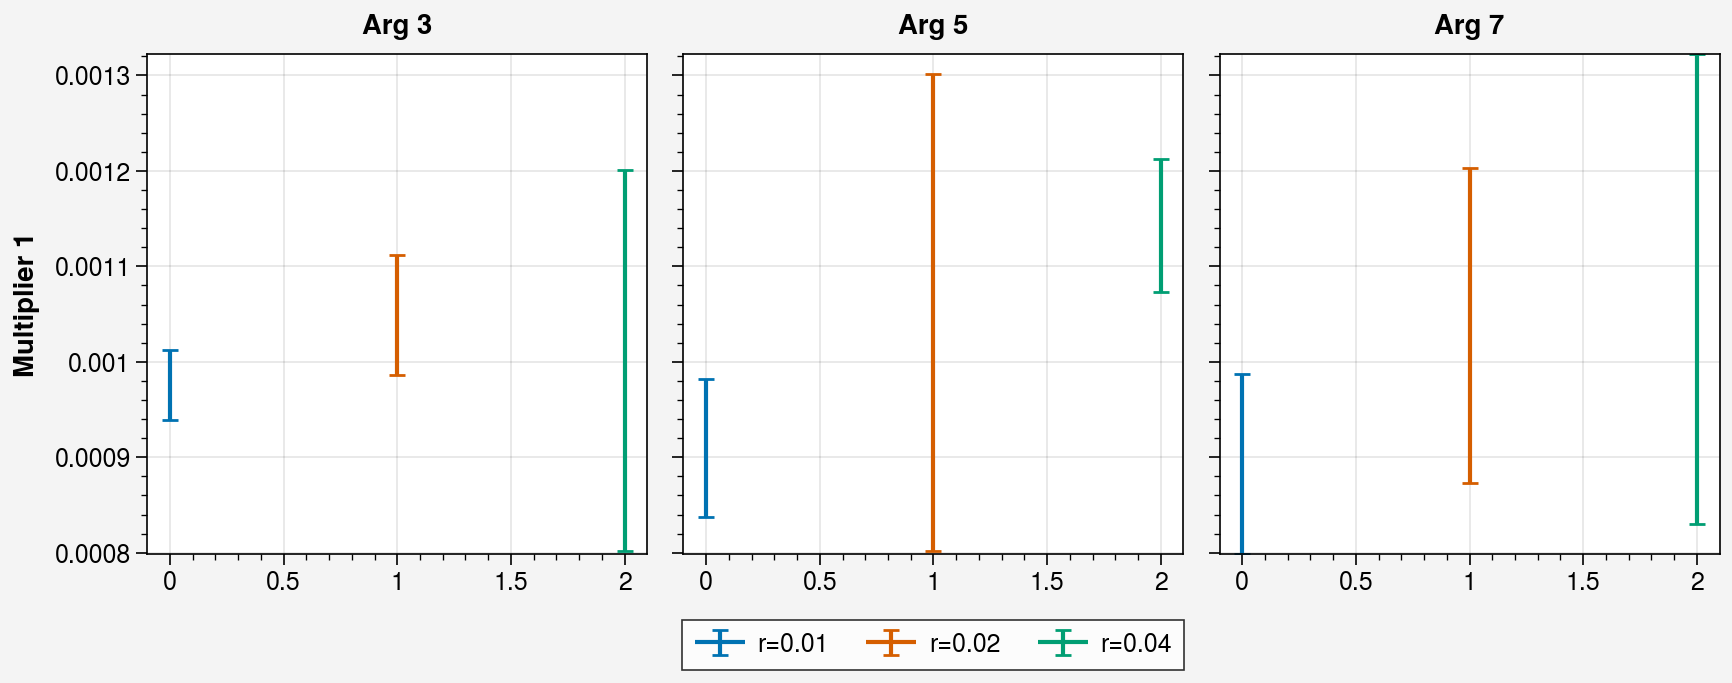

In [37]:
explores = pickle.load(open('data/explore/hyperparams500', 'rb'))

eps = [0.01, 0.02, 0.04]
mults = [1]
args = [3, 5, 7]

fig, ax = pplt.subplots(ncols=3, nrows=1)

for i, mult in enumerate(mults):
    for j, arg in enumerate(args):
        lines = []
        
        for k, ep in enumerate(eps):
            exp_name = f'nav_4wefc_ep{ep}mult{mult}arg{arg}'
            
            effs = explores[exp_name]
            means = []
            stds = []
            for i in range(3):
                means.append(np.mean(effs[i]))
                stds.append(np.std(effs[i]))
            
            # ax[i, j].errorbar(np.arange(3) + 3*k, means, stds)
            # ax[j].errorbar(np.arange(3) + 3*k, means, stds)
            line = ax[j].errorbar(k, np.mean(effs), np.std(effs), label=f'r={ep}')
            lines.append(line)
            
ax.format(leftlabels=[f'Multiplier {mult}' for mult in mults],
          toplabels=[f'Arg {arg}' for arg in args])
fig.legend(lines, loc='b')

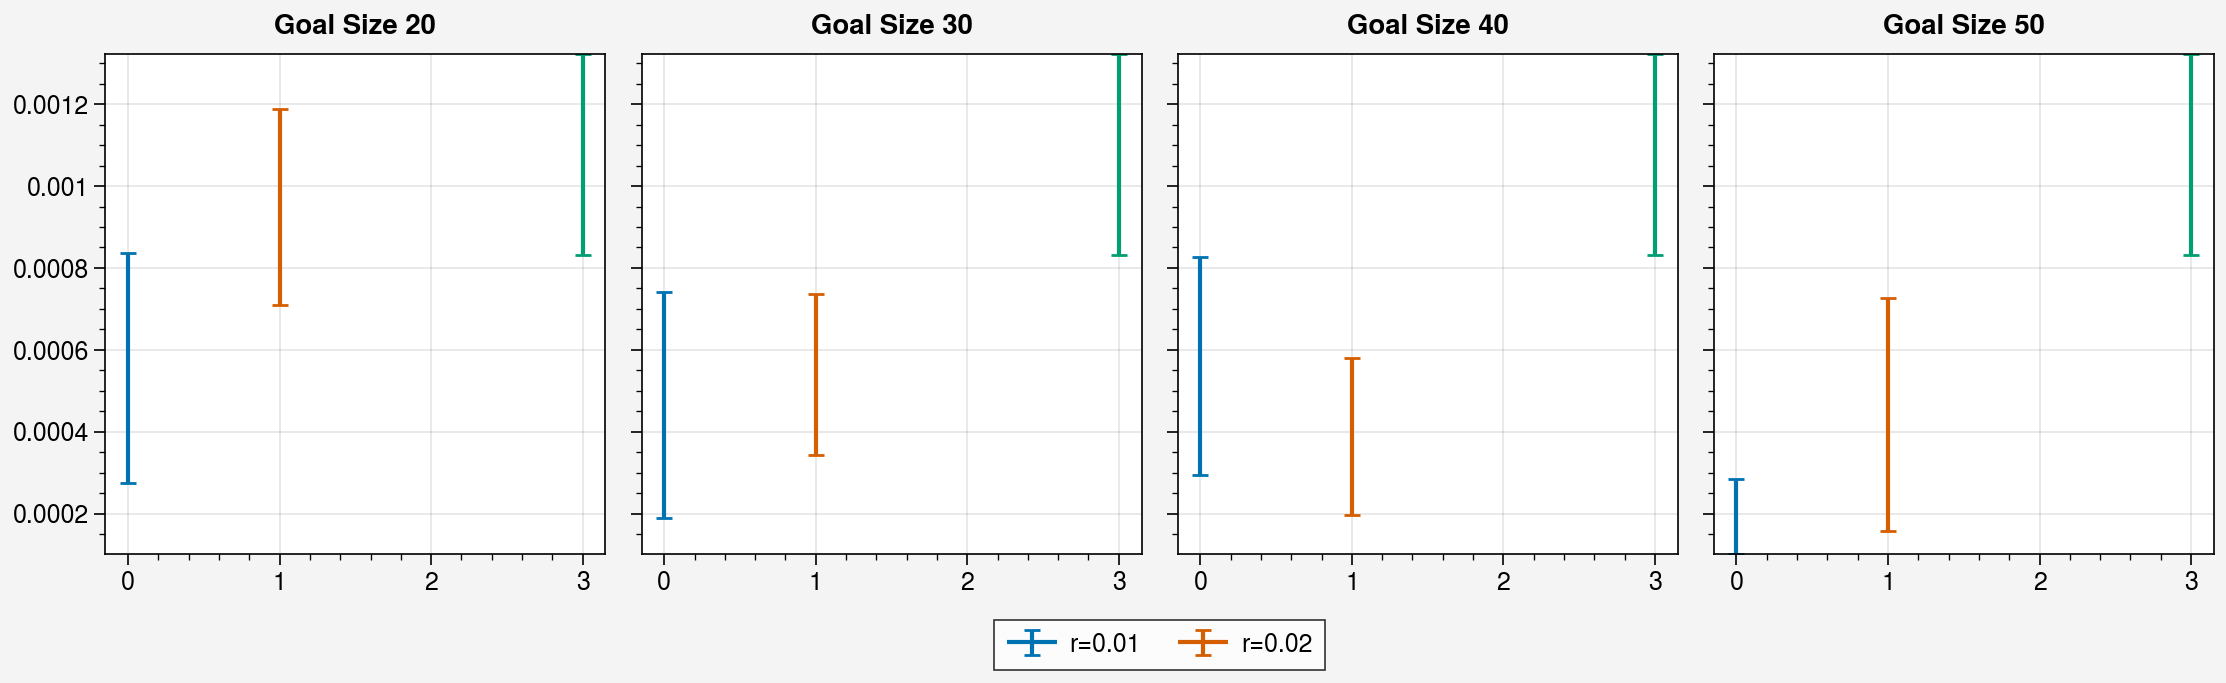

In [38]:
explores = pickle.load(open('data/explore/goalsize500', 'rb'))

eps = [0.01, 0.02]
goal_sizes = [20, 30, 40, 50]

fig, ax = pplt.subplots(ncols=4, nrows=1)

for j, goal in enumerate(goal_sizes):
    lines = []

    for k, ep in enumerate(eps):
        exp_name = f'expl_goalpos_punishbonusep{ep}goal{goal}'

        effs = explores[exp_name]
        means = []
        stds = []
        for i in range(3):
            means.append(np.mean(effs[i]))
            stds.append(np.std(effs[i]))

        # ax[i, j].errorbar(np.arange(3) + 3*k, means, stds)
        # ax[j].errorbar(np.arange(3) + 3*k, means, stds)
        line = ax[j].errorbar(k, np.mean(effs), np.std(effs), label=f'r={ep}')
        lines.append(line)
        
    
# Add best from earlier test for comparison
explores = pickle.load(open('data/explore/hyperparams500', 'rb'))
for j in range(4):
    exp_name = f'nav_4wefc_ep0.04mult1arg7'
    effs = explores[exp_name]
    ax[j].errorbar(3, np.mean(effs), np.std(effs))

ax.format(#leftlabels=[f'Multiplier {mult}' for mult in mults],
          toplabels=[f'Goal Size {goal}' for goal in goal_sizes])
fig.legend(lines, loc='b')

In [6]:
pplt.rc.reset()

In [8]:
exp_name

'nav_4wefc_ep0.04mult5arg7'

In [11]:
np.mean(explores[exp_name][0])

0.0011732278620531834

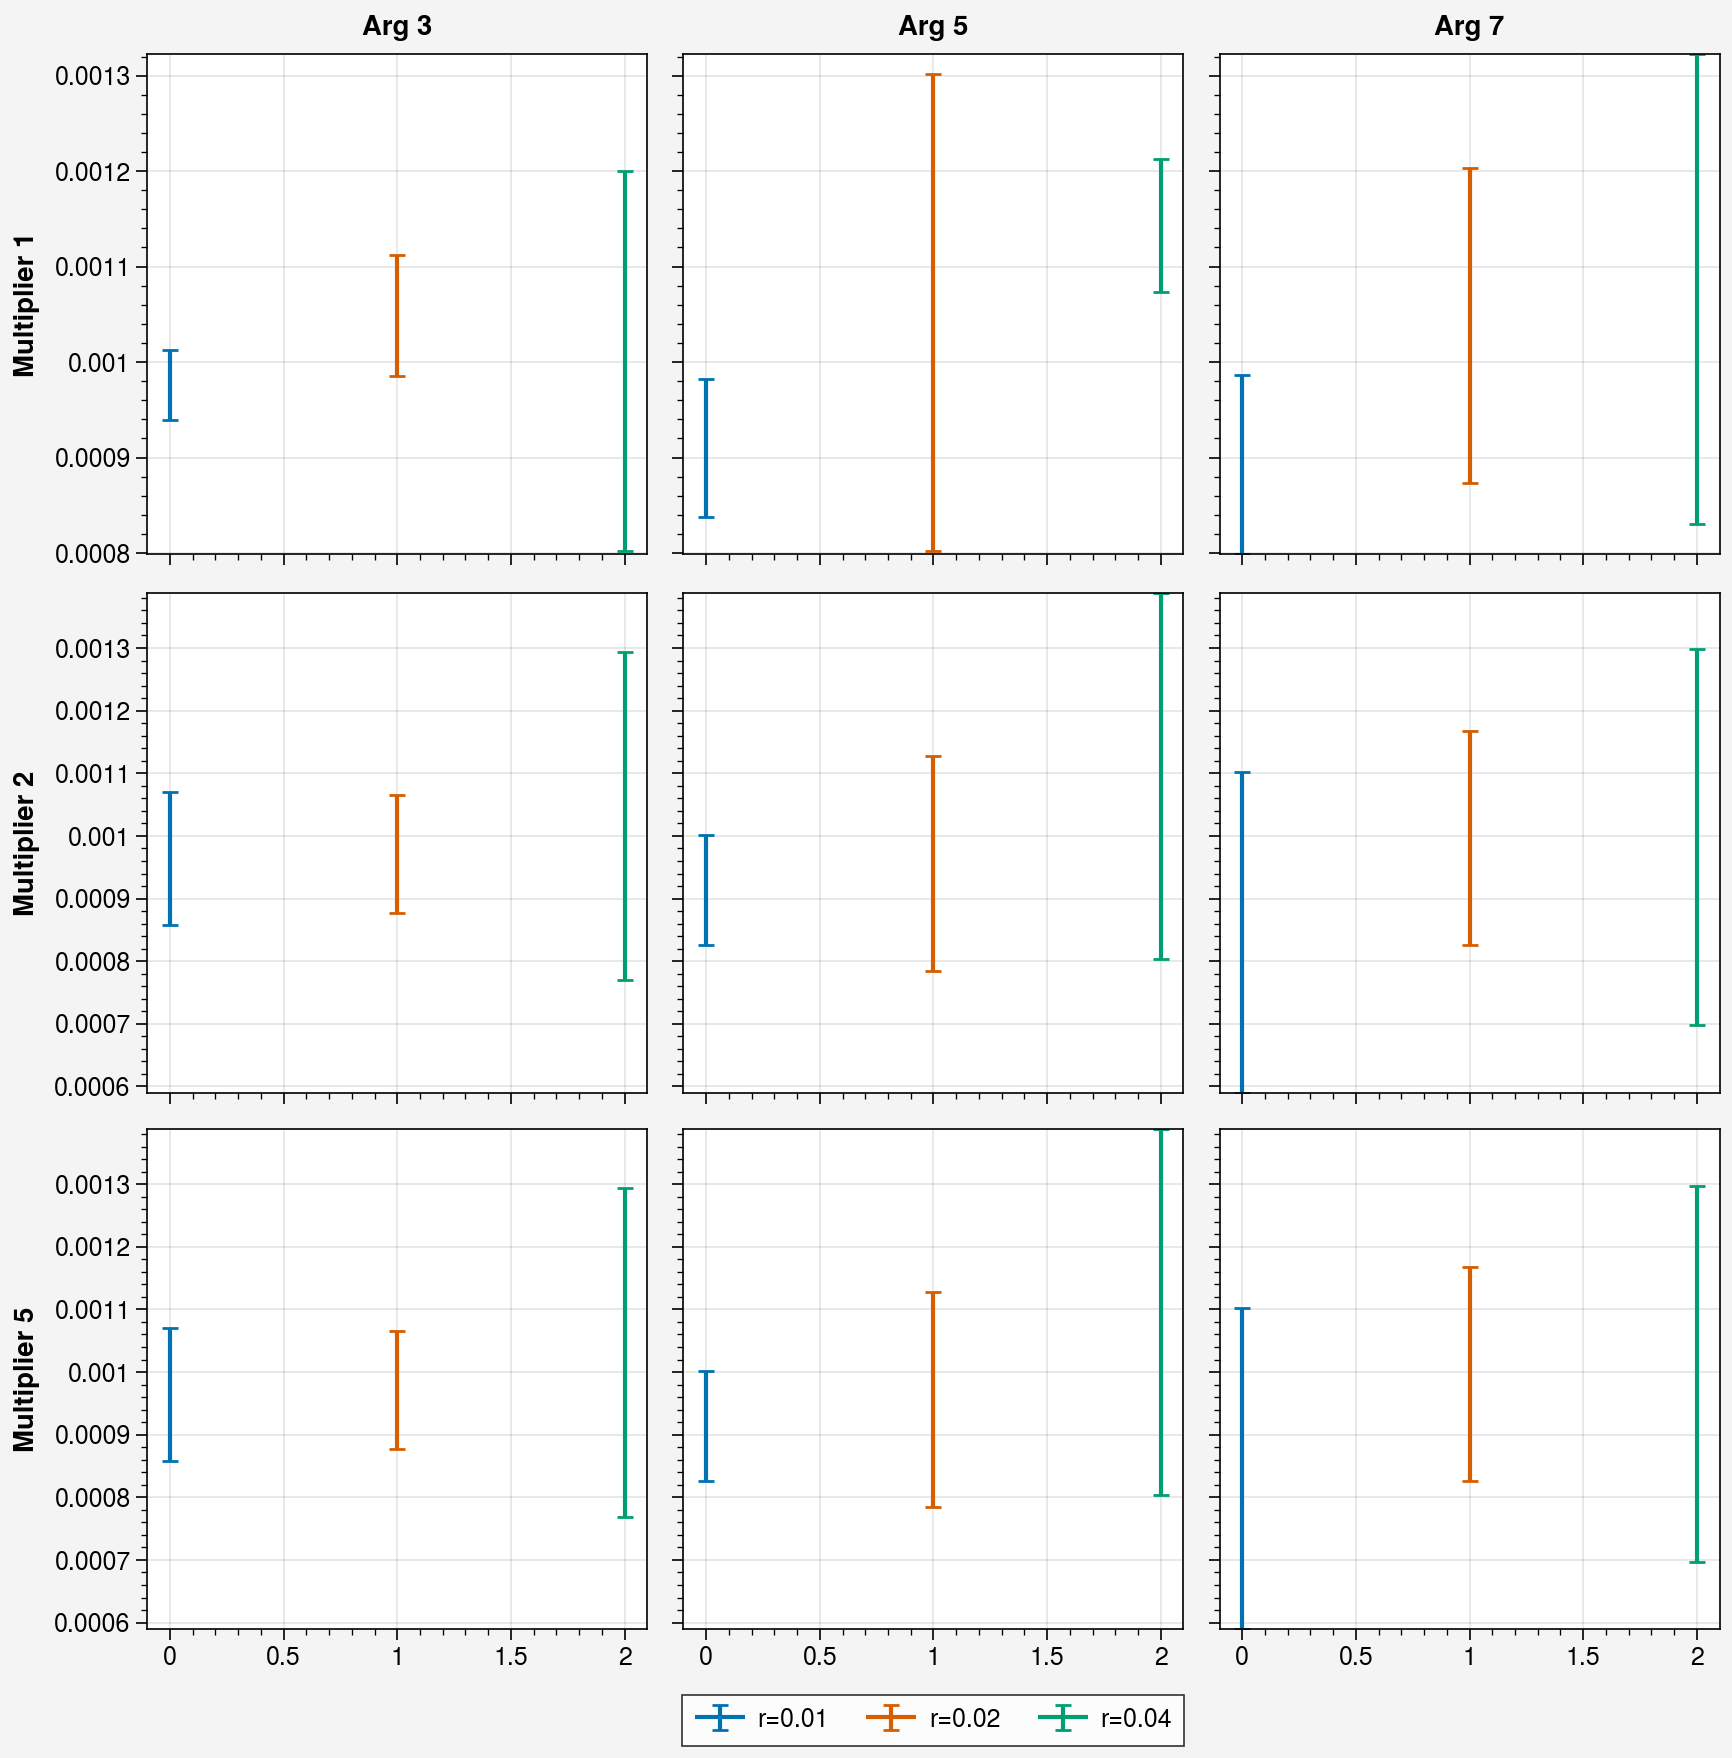

In [12]:
explores = pickle.load(open('data/explore/hyperparams500', 'rb'))

eps = [0.01, 0.02, 0.04]
mults = [1, 2, 5]
args = [3, 5, 7]

fig, ax = pplt.subplots(ncols=3, nrows=3)

for i, mult in enumerate(mults):
    for j, arg in enumerate(args):
        lines = []
        
        for k, ep in enumerate(eps):
            exp_name = f'nav_4wefc_ep{ep}mult{mult}arg{arg}'
            
            effs = explores[exp_name]
            means = []
            stds = []
            for n in range(3):
                means.append(np.mean(effs[n]))
                stds.append(np.std(effs[n]))
            
            # ax[i, j].errorbar(np.arange(3) + 3*k, means, stds)
            # ax[j].errorbar(np.arange(3) + 3*k, means, stds)
            line = ax[i, j].errorbar(k, np.mean(effs), np.std(effs), label=f'r={ep}')
            lines.append(line)
            
ax.format(leftlabels=[f'Multiplier {mult}' for mult in mults],
          toplabels=[f'Arg {arg}' for arg in args])
fig.legend(lines, loc='b')

## Visualize trajectories of fixed starting conditions

* Generally it looks like arg 7 for reward shaping works the best to generate interesting exploration behaviors
* Punishment of 0.02-0.04 show good coverage (maybe 0.03 in between will be better)
* Some of the trajectories show occasional signs that the agent is aware of locations it has been
* Larger goal size leads to worse exploration performance

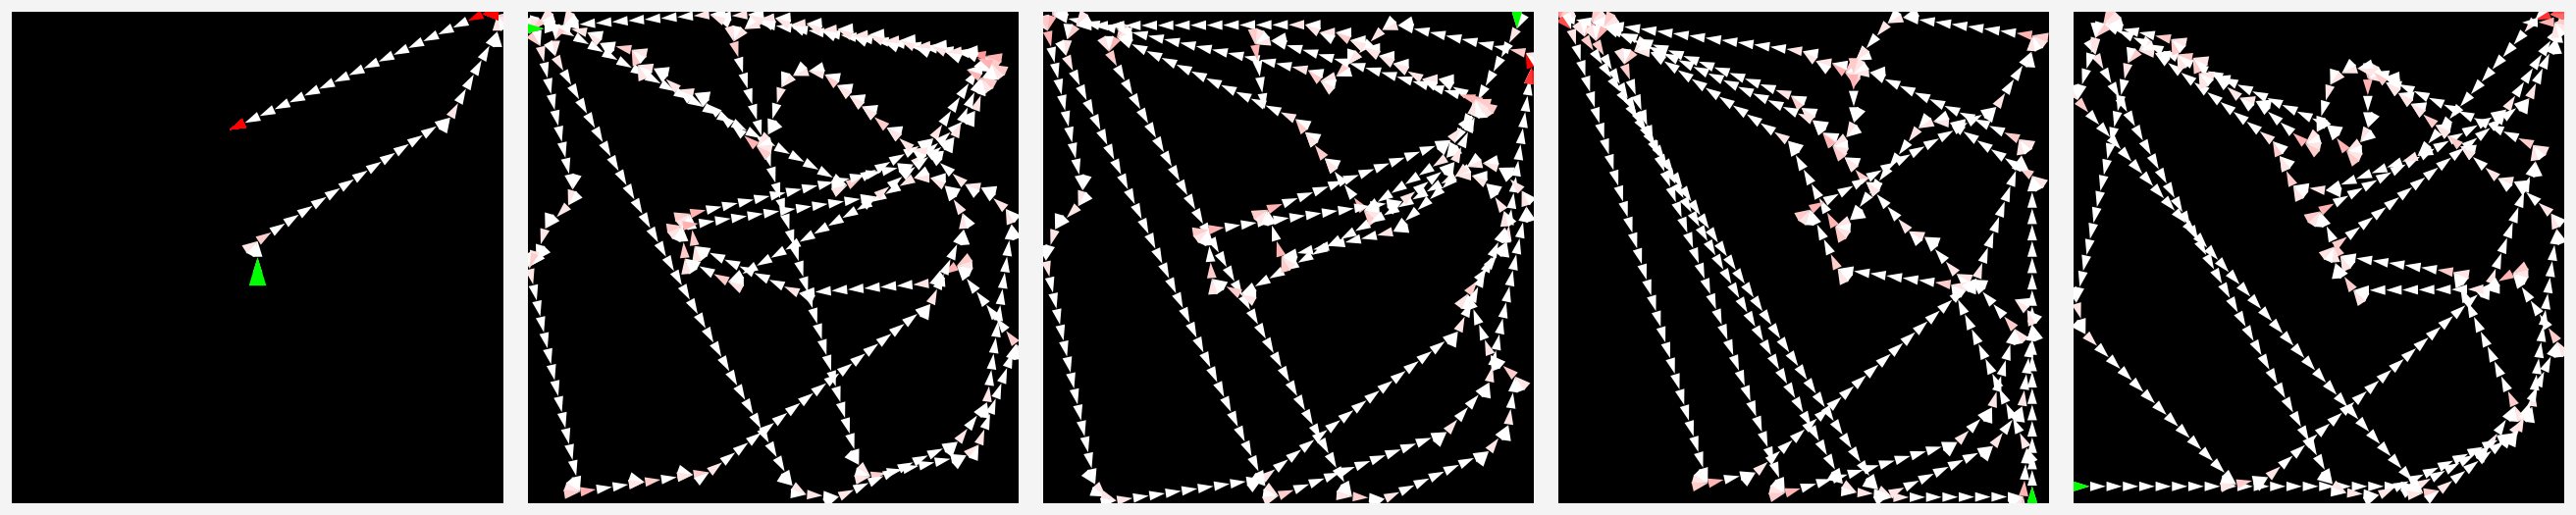

In [39]:
set_trajectory_plot_style()

ep = 0.04
mult = 1
arg = 7
trial = 0

exp_name = f'nav_4wefc_ep{ep}mult{mult}arg{arg}'
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/4wefc_punish/{save_file}')

effs, trajs = test_search_efficiency(model, obs_rms)

fig, ax = pplt.subplots(ncols=5)

for i in range(5):
    draw_trajectory(trajs[i][0], trajs[i][1], ax=ax[i])

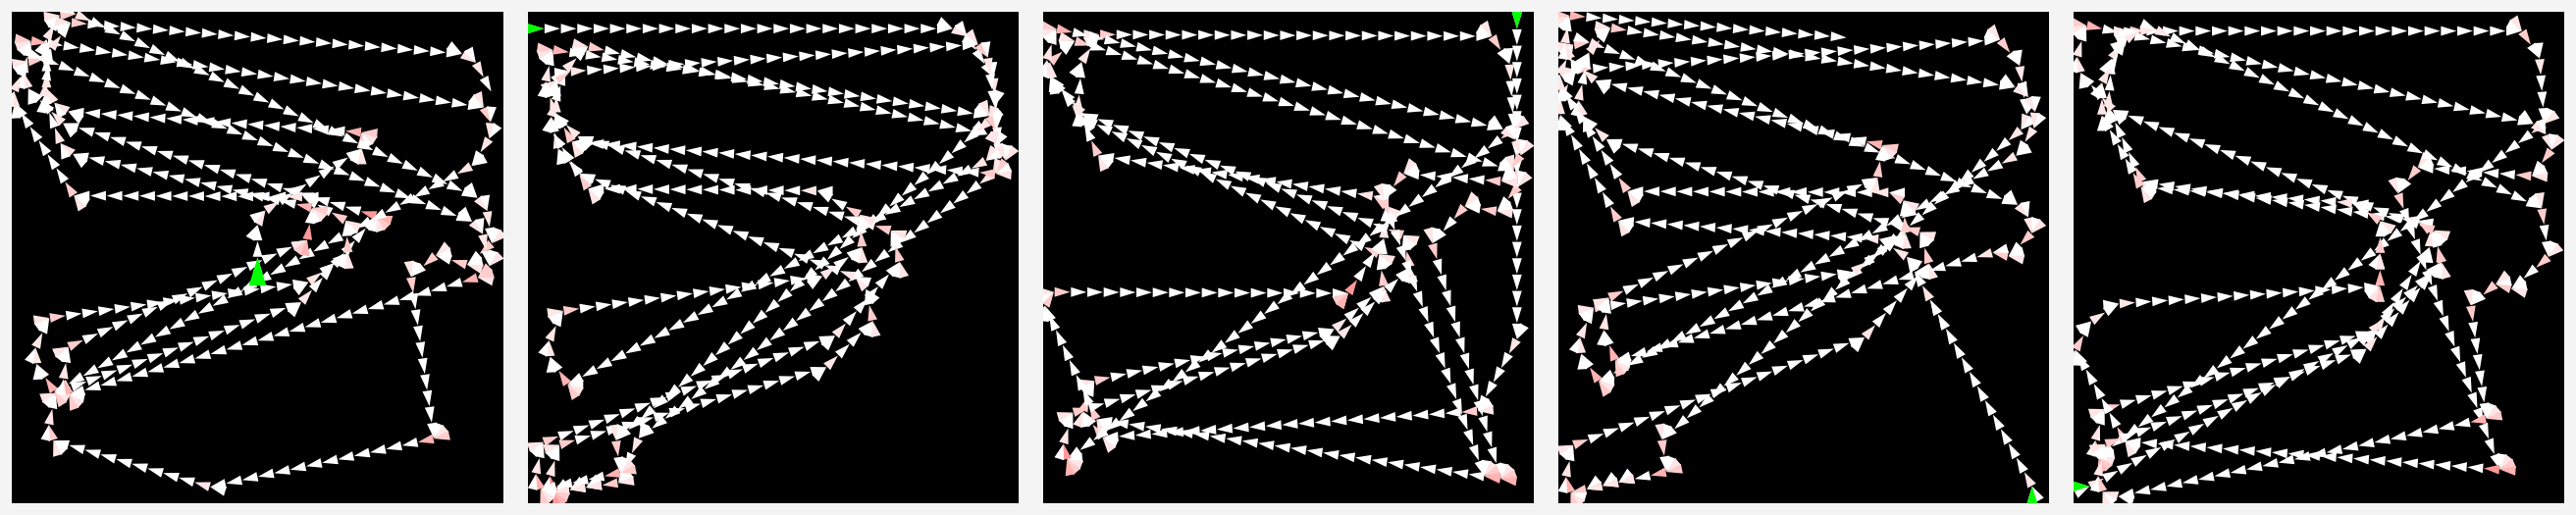

In [40]:
set_trajectory_plot_style()

ep = 0.04
mult = 1
arg = 7
trial = 1

exp_name = f'nav_4wefc_ep{ep}mult{mult}arg{arg}'
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/4wefc_punish/{save_file}')

effs, trajs = test_search_efficiency(model, obs_rms)

fig, ax = pplt.subplots(ncols=5)

for i in range(5):
    draw_trajectory(trajs[i][0], trajs[i][1], ax=ax[i])

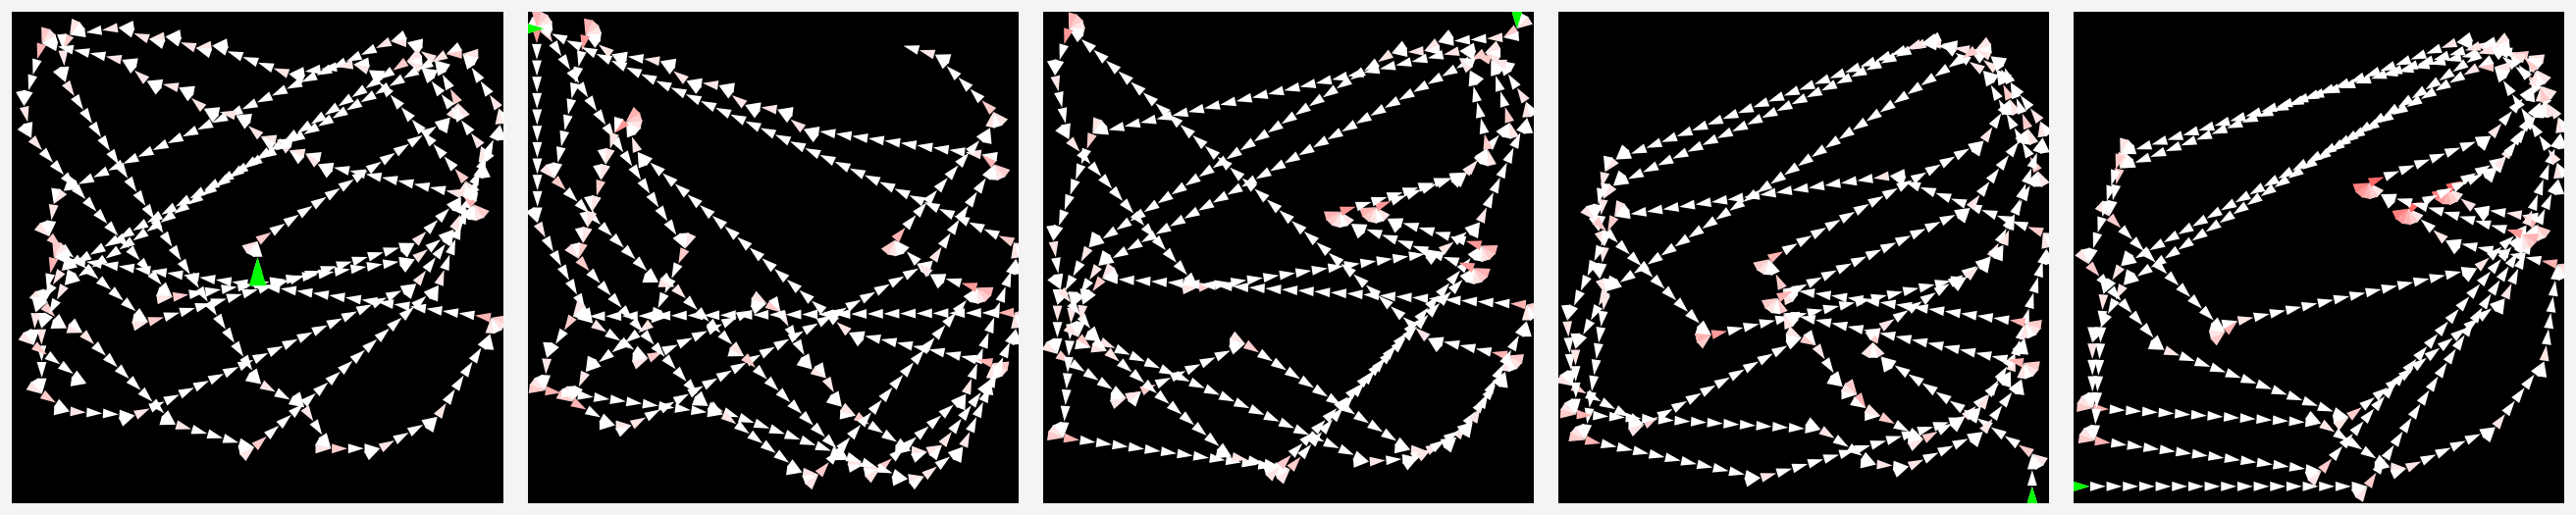

In [41]:
set_trajectory_plot_style()

ep = 0.04
mult = 1
arg = 7
trial = 2

exp_name = f'nav_4wefc_ep{ep}mult{mult}arg{arg}'
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/4wefc_punish/{save_file}')

effs, trajs = test_search_efficiency(model, obs_rms)

fig, ax = pplt.subplots(ncols=5)

for i in range(5):
    draw_trajectory(trajs[i][0], trajs[i][1], ax=ax[i])

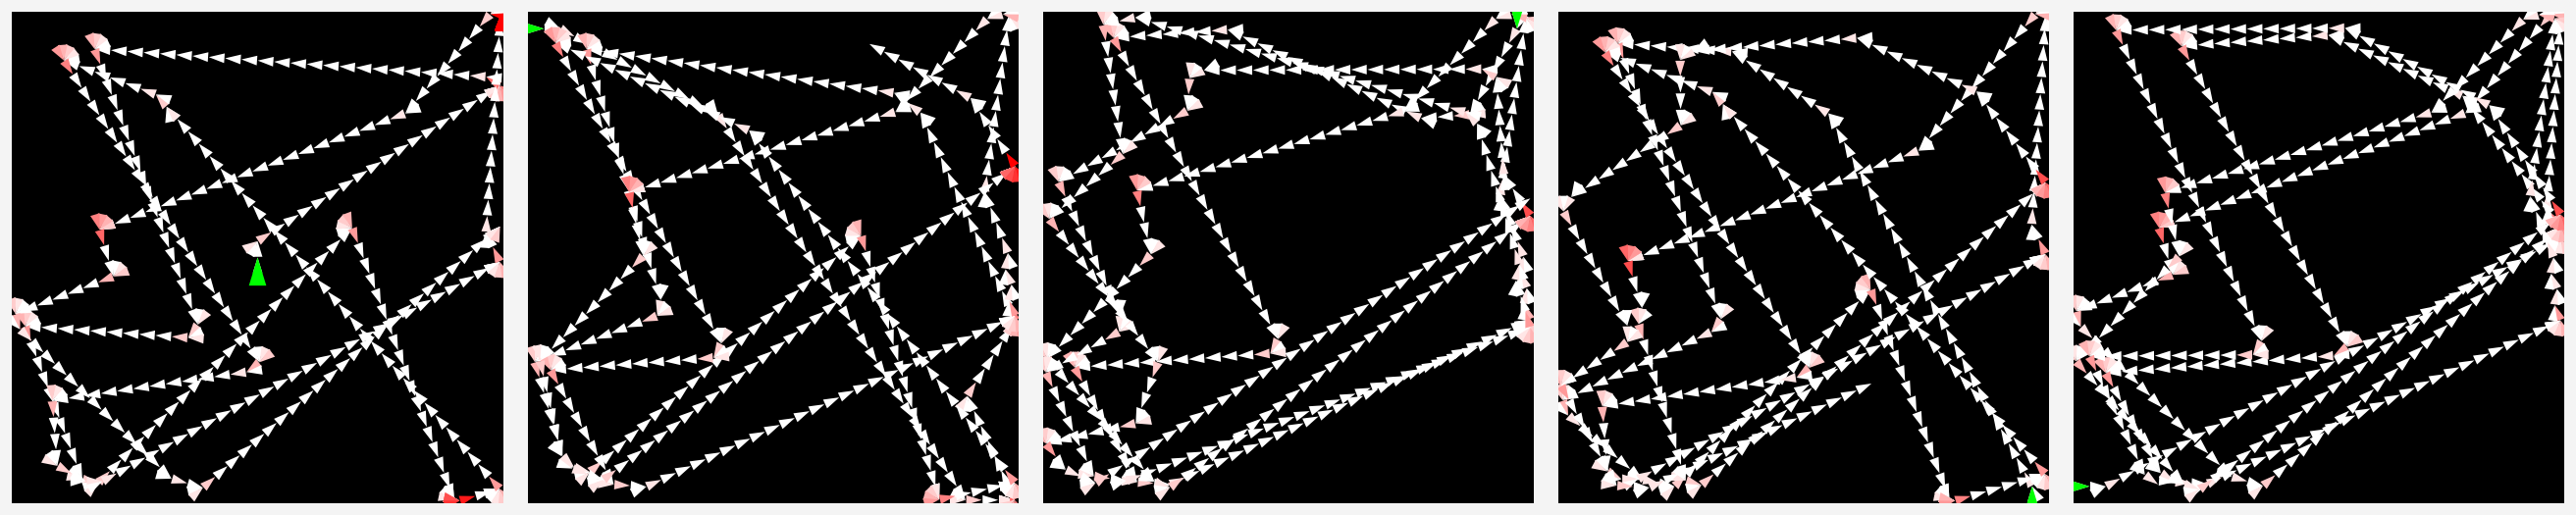

In [42]:
set_trajectory_plot_style()

ep = 0.02
mult = 1
arg = 7
trial = 2

exp_name = f'nav_4wefc_ep{ep}mult{mult}arg{arg}'
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/4wefc_punish/{save_file}')

effs, trajs, ress = test_search_efficiency(model, obs_rms, ret_res=True)

fig, ax = pplt.subplots(ncols=5)

for i in range(5):
    draw_trajectory(trajs[i][0], trajs[i][1], ax=ax[i])

### Multipliers

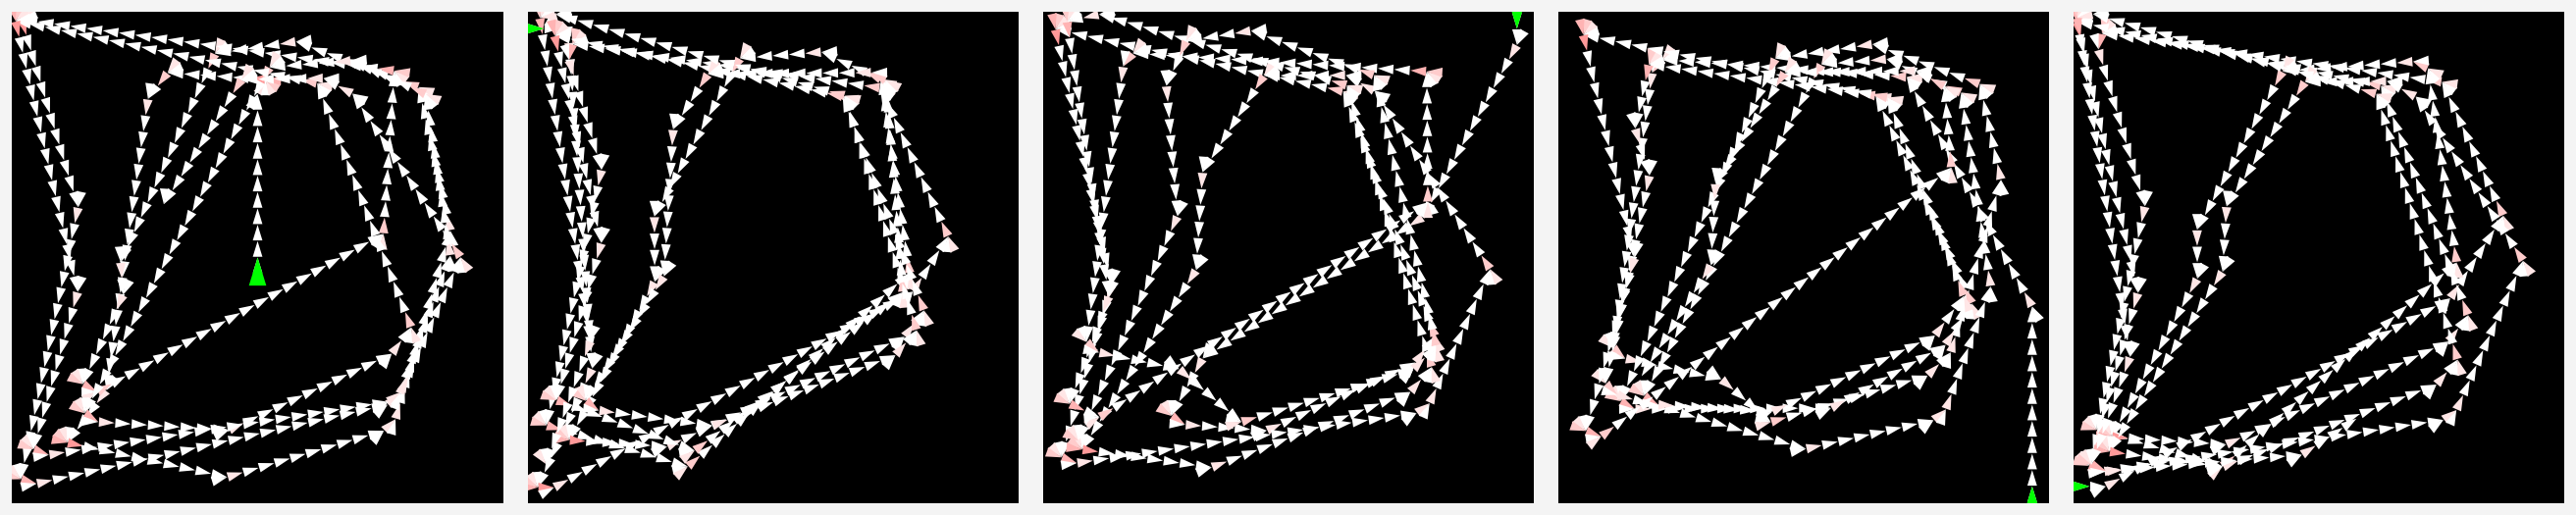

In [13]:
set_trajectory_plot_style()

ep = 0.02
mult = 5
arg = 7
trial = 2

exp_name = f'nav_4wefc_ep{ep}mult{mult}arg{arg}'
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/4wefc_punish/{save_file}')

effs, trajs, ress = test_search_efficiency(model, obs_rms, ret_res=True)

fig, ax = pplt.subplots(ncols=5)

for i in range(5):
    draw_trajectory(trajs[i][0], trajs[i][1], ax=ax[i])

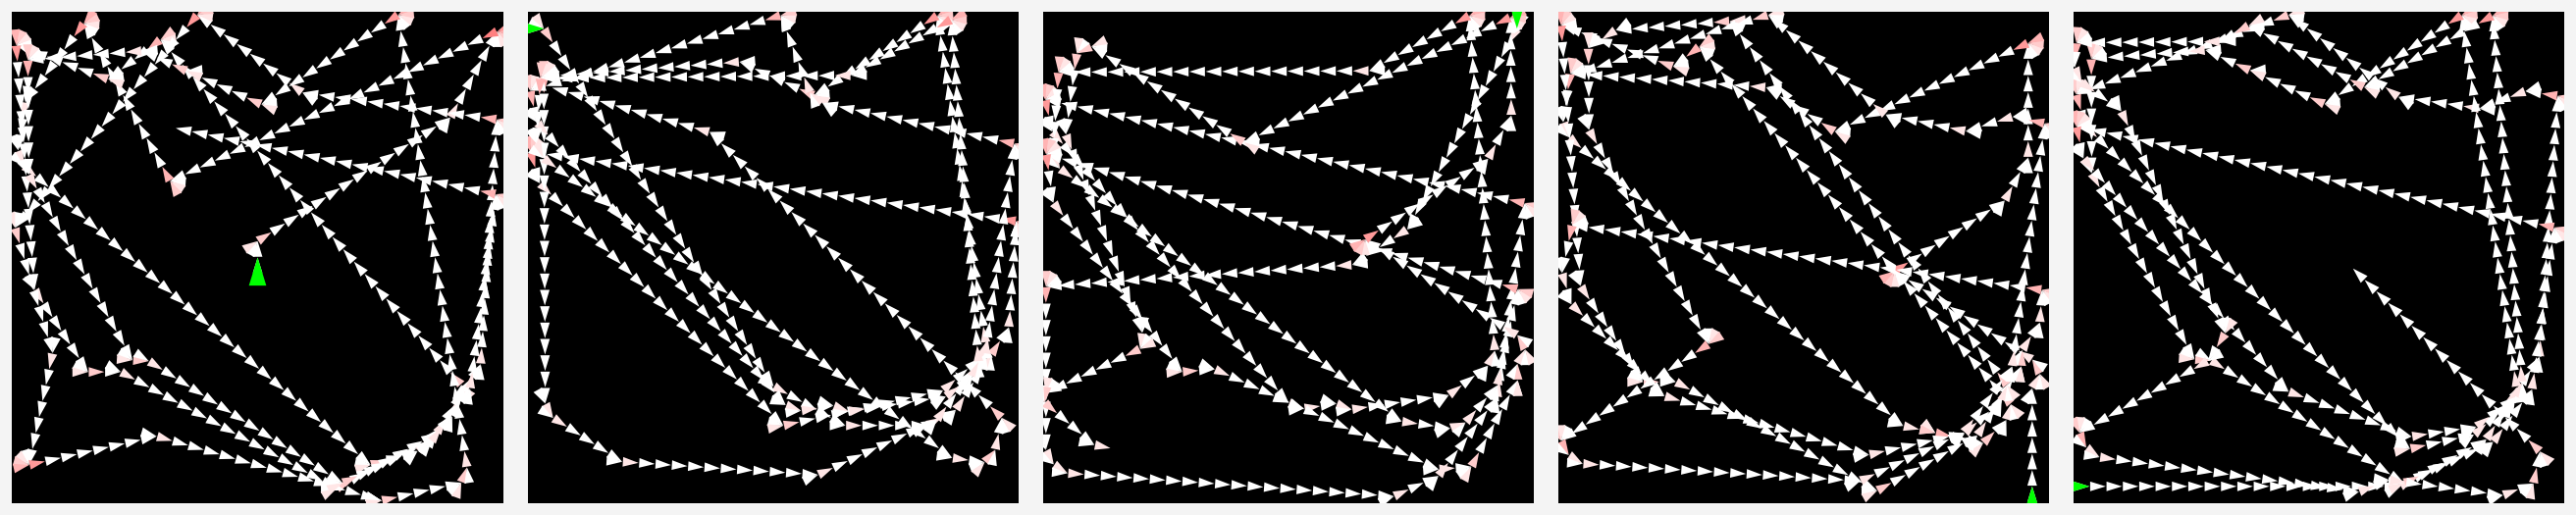

In [17]:
set_trajectory_plot_style()

ep = 0.04
mult = 5
arg = 7
trial = 0

exp_name = f'nav_4wefc_ep{ep}mult{mult}arg{arg}'
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/4wefc_punish/{save_file}')

effs, trajs, ress = test_search_efficiency(model, obs_rms, ret_res=True)

fig, ax = pplt.subplots(ncols=5)

for i in range(5):
    draw_trajectory(trajs[i][0], trajs[i][1], ax=ax[i])

**Arg 5, mult 2, ep 0.02**

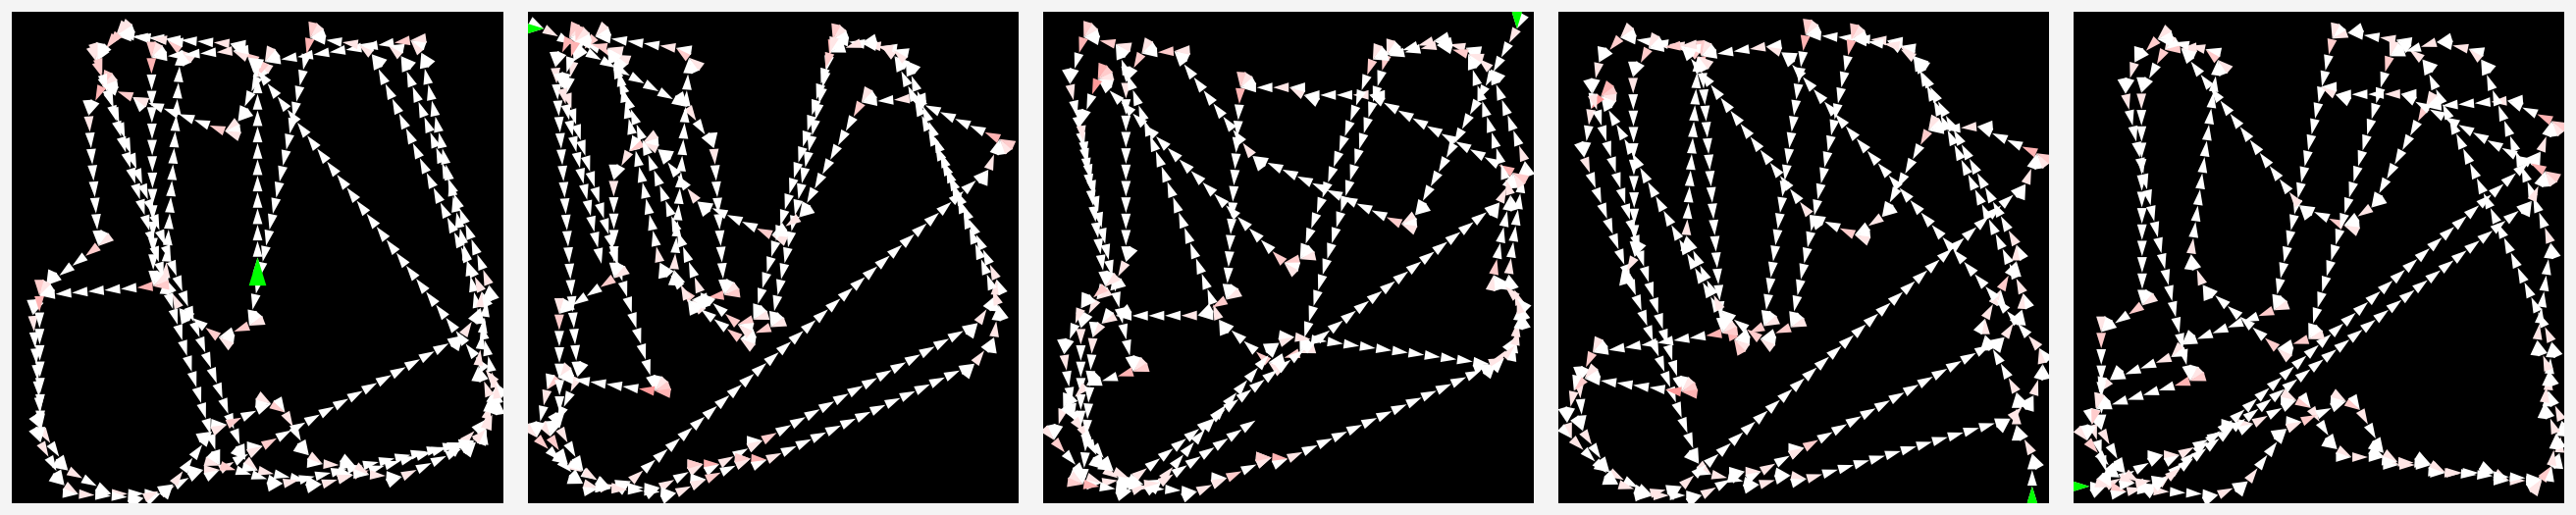

In [29]:
set_trajectory_plot_style()

ep = 0.04
mult = 2
arg = 5
trial = 0

exp_name = f'nav_4wefc_ep{ep}mult{mult}arg{arg}'
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/4wefc_punish/{save_file}')

effs, trajs, ress = test_search_efficiency(model, obs_rms, ret_res=True)

fig, ax = pplt.subplots(ncols=5)

for i in range(5):
    draw_trajectory(trajs[i][0], trajs[i][1], ax=ax[i])

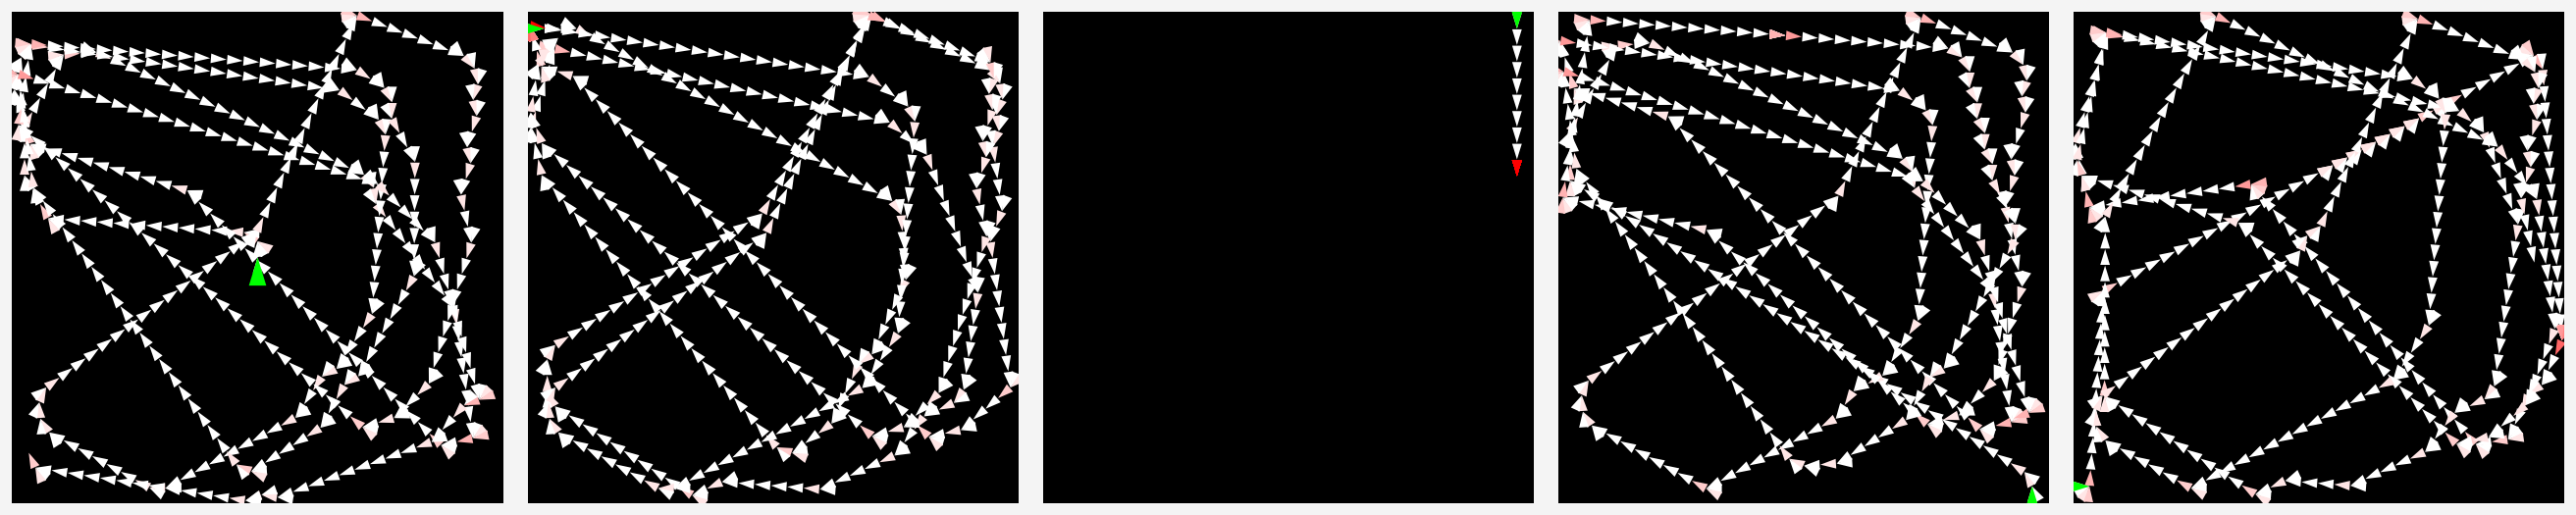

In [30]:
set_trajectory_plot_style()

ep = 0.04
mult = 2
arg = 5
trial = 1

exp_name = f'nav_4wefc_ep{ep}mult{mult}arg{arg}'
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/4wefc_punish/{save_file}')

effs, trajs, ress = test_search_efficiency(model, obs_rms, ret_res=True)

fig, ax = pplt.subplots(ncols=5)

for i in range(5):
    draw_trajectory(trajs[i][0], trajs[i][1], ax=ax[i])

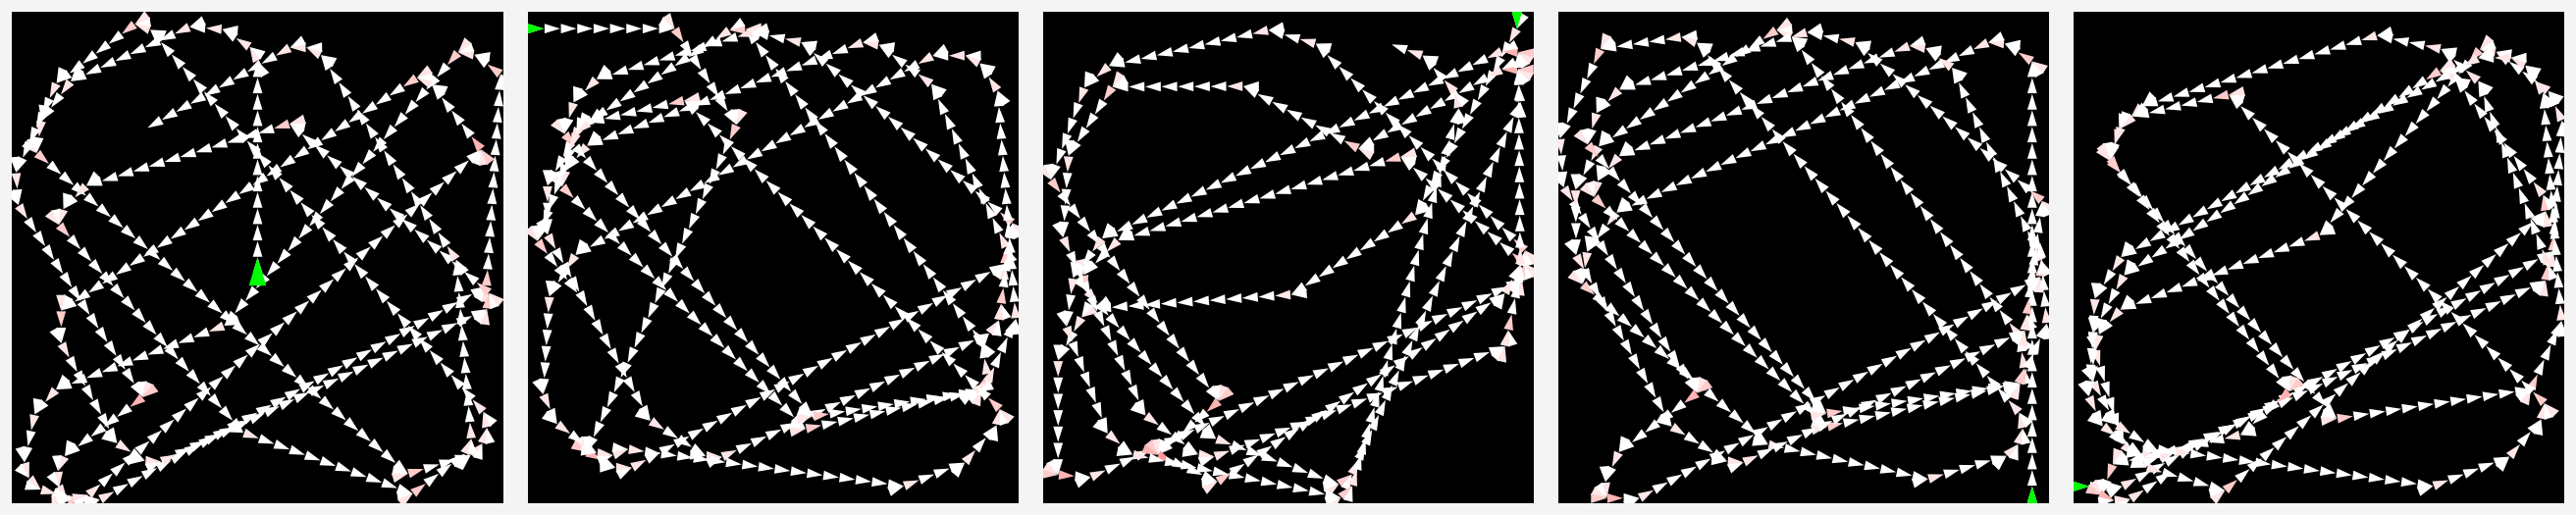

In [31]:
set_trajectory_plot_style()

ep = 0.04
mult = 2
arg = 5
trial = 2

exp_name = f'nav_4wefc_ep{ep}mult{mult}arg{arg}'
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/4wefc_punish/{save_file}')

effs, trajs, ress = test_search_efficiency(model, obs_rms, ret_res=True)

fig, ax = pplt.subplots(ncols=5)

for i in range(5):
    draw_trajectory(trajs[i][0], trajs[i][1], ax=ax[i])

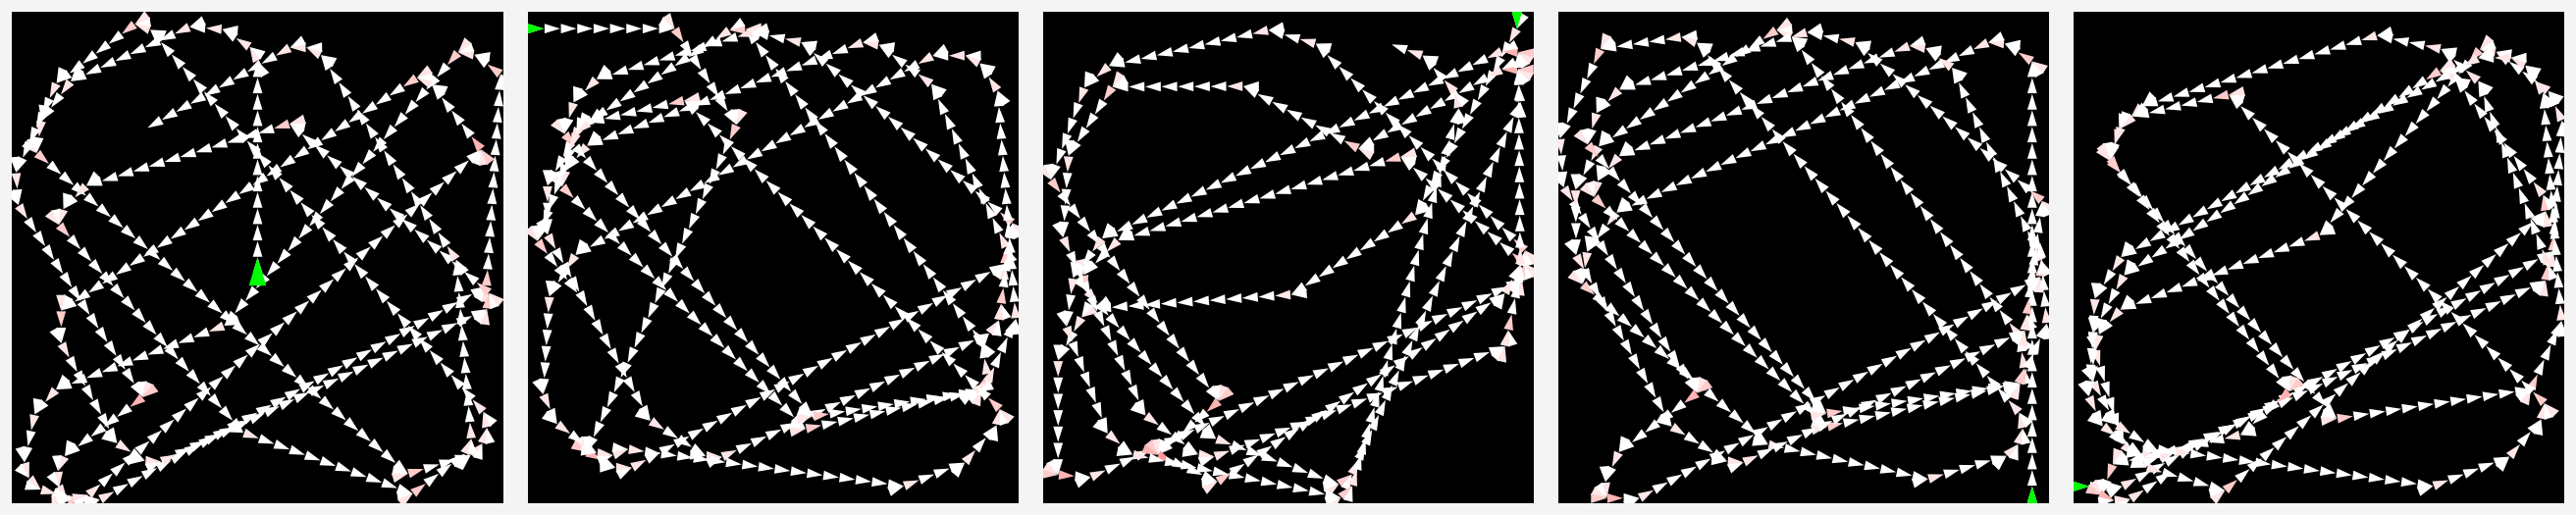

In [36]:
set_trajectory_plot_style()

ep = 0.04
mult = 2
arg = 5
trial = 2

exp_name = f'nav_4wefc_ep{ep}mult{mult}arg{arg}'
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/4wefc_punish/{save_file}')

effs, trajs, ress = test_search_efficiency(model, obs_rms, ret_res=True)

fig, ax = pplt.subplots(ncols=5)

for i in range(5):
    draw_trajectory(trajs[i][0], trajs[i][1], ax=ax[i])

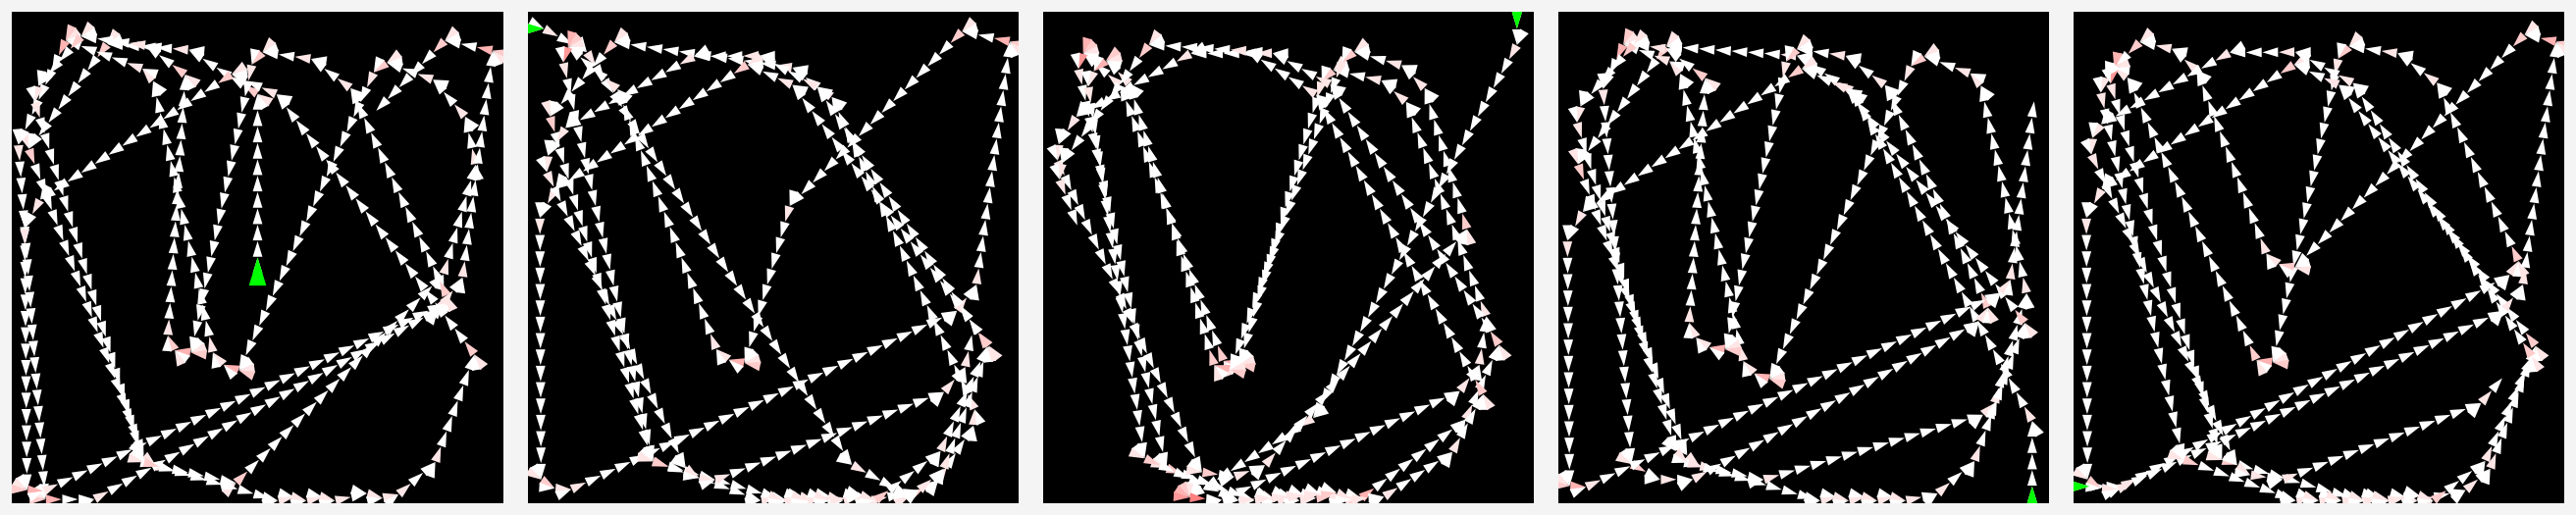

In [38]:
set_trajectory_plot_style()

ep = 0.04
mult = 1
arg = 5
trial = 2

exp_name = f'nav_4wefc_ep{ep}mult{mult}arg{arg}'
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/4wefc_punish/{save_file}')

effs, trajs, ress = test_search_efficiency(model, obs_rms, ret_res=True)

fig, ax = pplt.subplots(ncols=5)

for i in range(5):
    draw_trajectory(trajs[i][0], trajs[i][1], ax=ax[i])

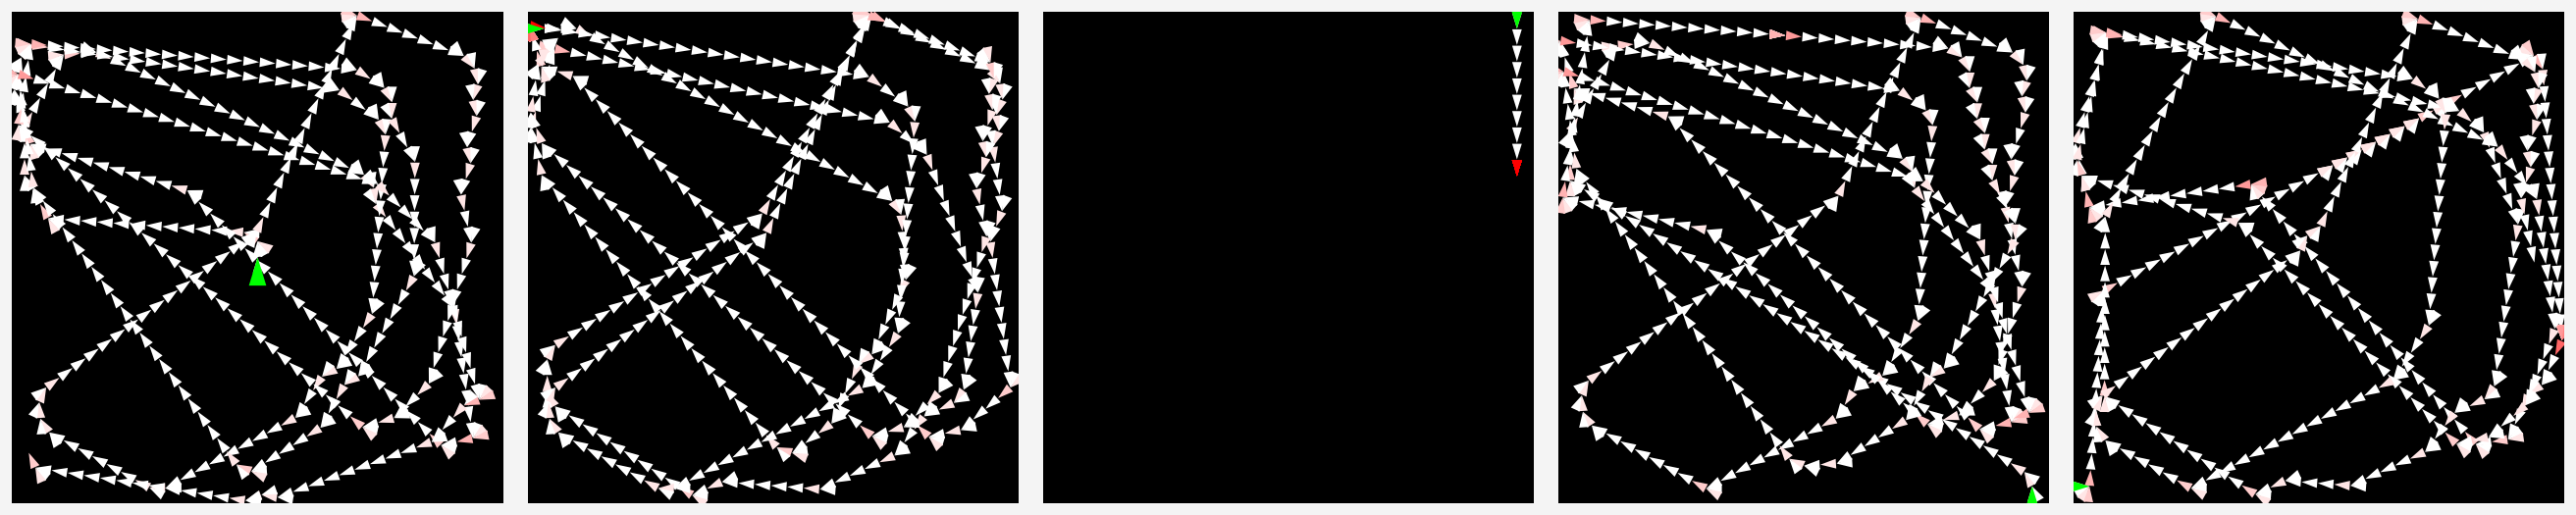

In [37]:
set_trajectory_plot_style()

ep = 0.04
mult = 5
arg = 5
trial = 1

exp_name = f'nav_4wefc_ep{ep}mult{mult}arg{arg}'
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/4wefc_punish/{save_file}')

effs, trajs, ress = test_search_efficiency(model, obs_rms, ret_res=True)

fig, ax = pplt.subplots(ncols=5)

for i in range(5):
    draw_trajectory(trajs[i][0], trajs[i][1], ax=ax[i])

### Goal sizes

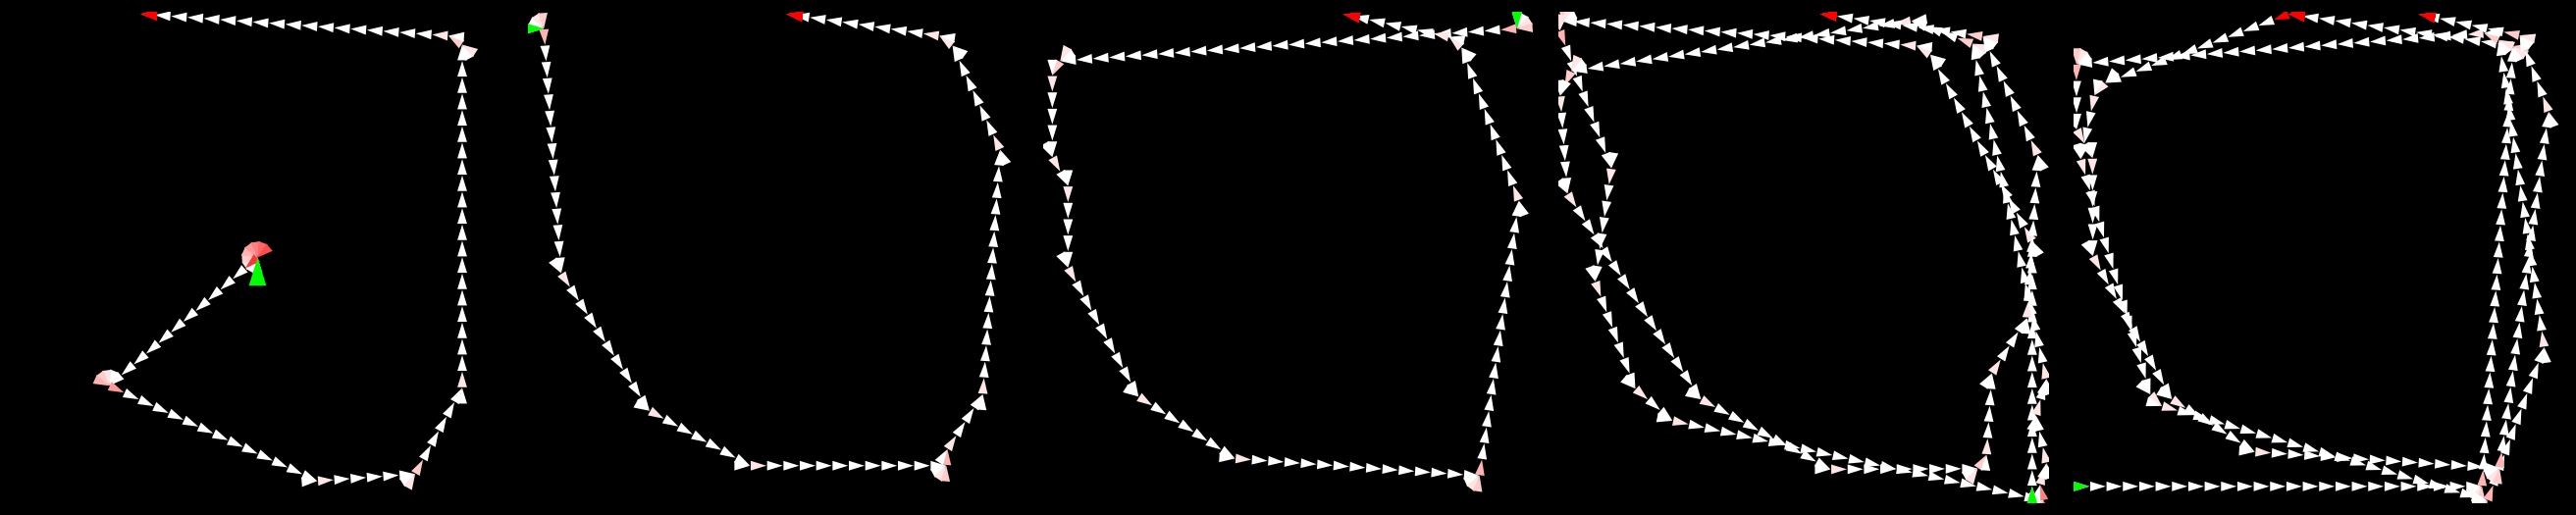

In [53]:
set_trajectory_plot_style()

ep = 0.02
goal = 30
trial = 2

exp_name = f'expl_goalpos_punishbonusep{ep}goal{goal}'    
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/explorenav_pos/{save_file}')

effs, trajs, ress = test_search_efficiency(model, obs_rms, ret_res=True,
                                          env_kwargs={'obs_set': 3})

fig, ax = pplt.subplots(ncols=5)

for i in range(5):
    draw_trajectory(trajs[i][0], trajs[i][1], ax=ax[i])

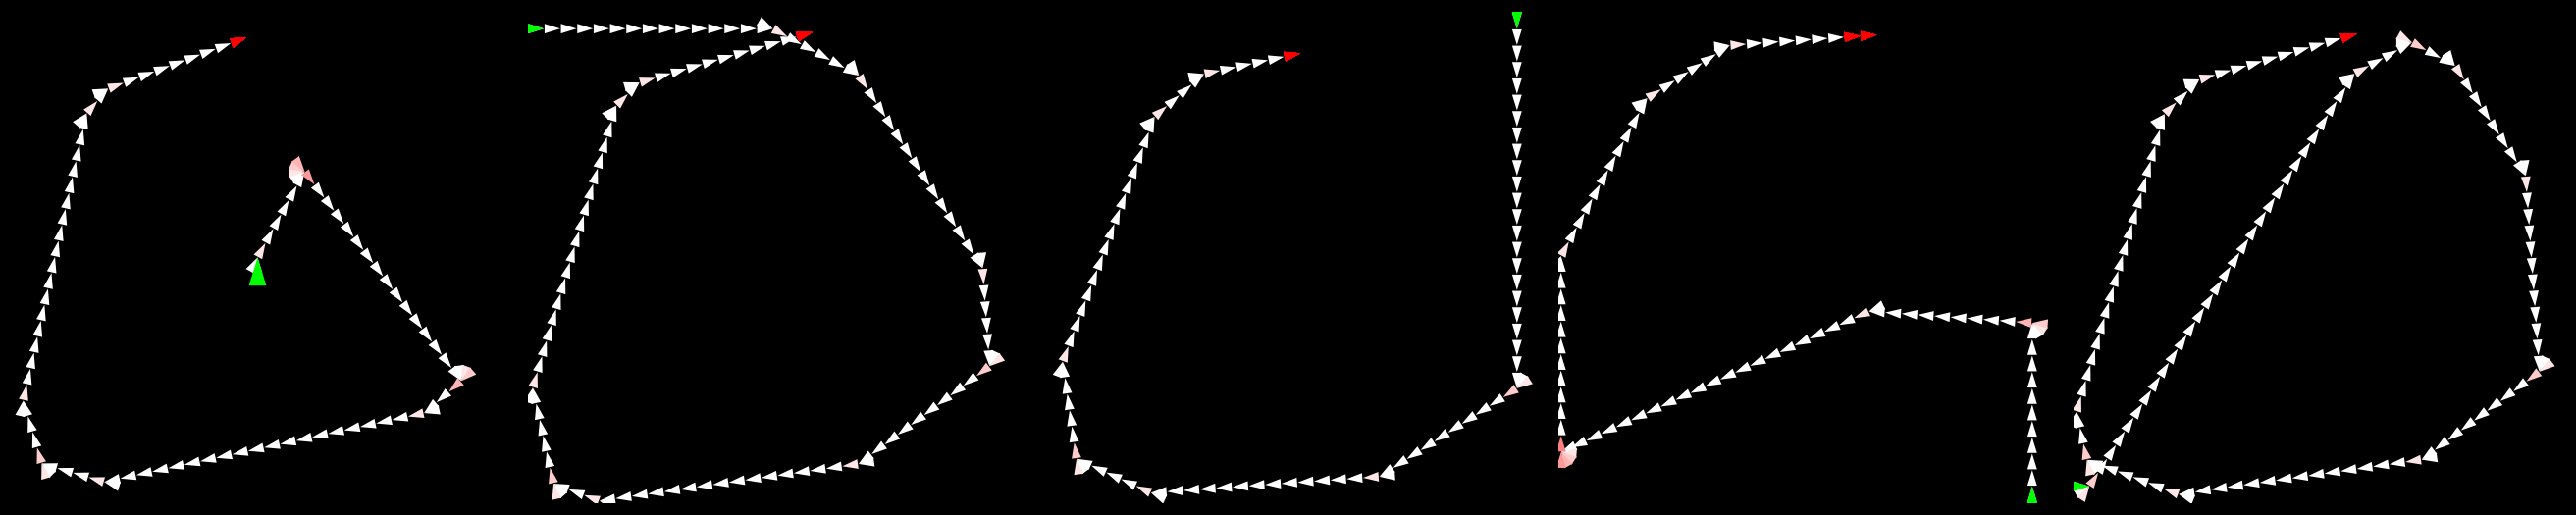

In [54]:
set_trajectory_plot_style()

ep = 0.02
goal = 40
trial = 1

exp_name = f'expl_goalpos_punishbonusep{ep}goal{goal}'    
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/explorenav_pos/{save_file}')

effs, trajs, ress = test_search_efficiency(model, obs_rms, ret_res=True,
                                          env_kwargs={'obs_set': 3})

fig, ax = pplt.subplots(ncols=5)

for i in range(5):
    draw_trajectory(trajs[i][0], trajs[i][1], ax=ax[i])

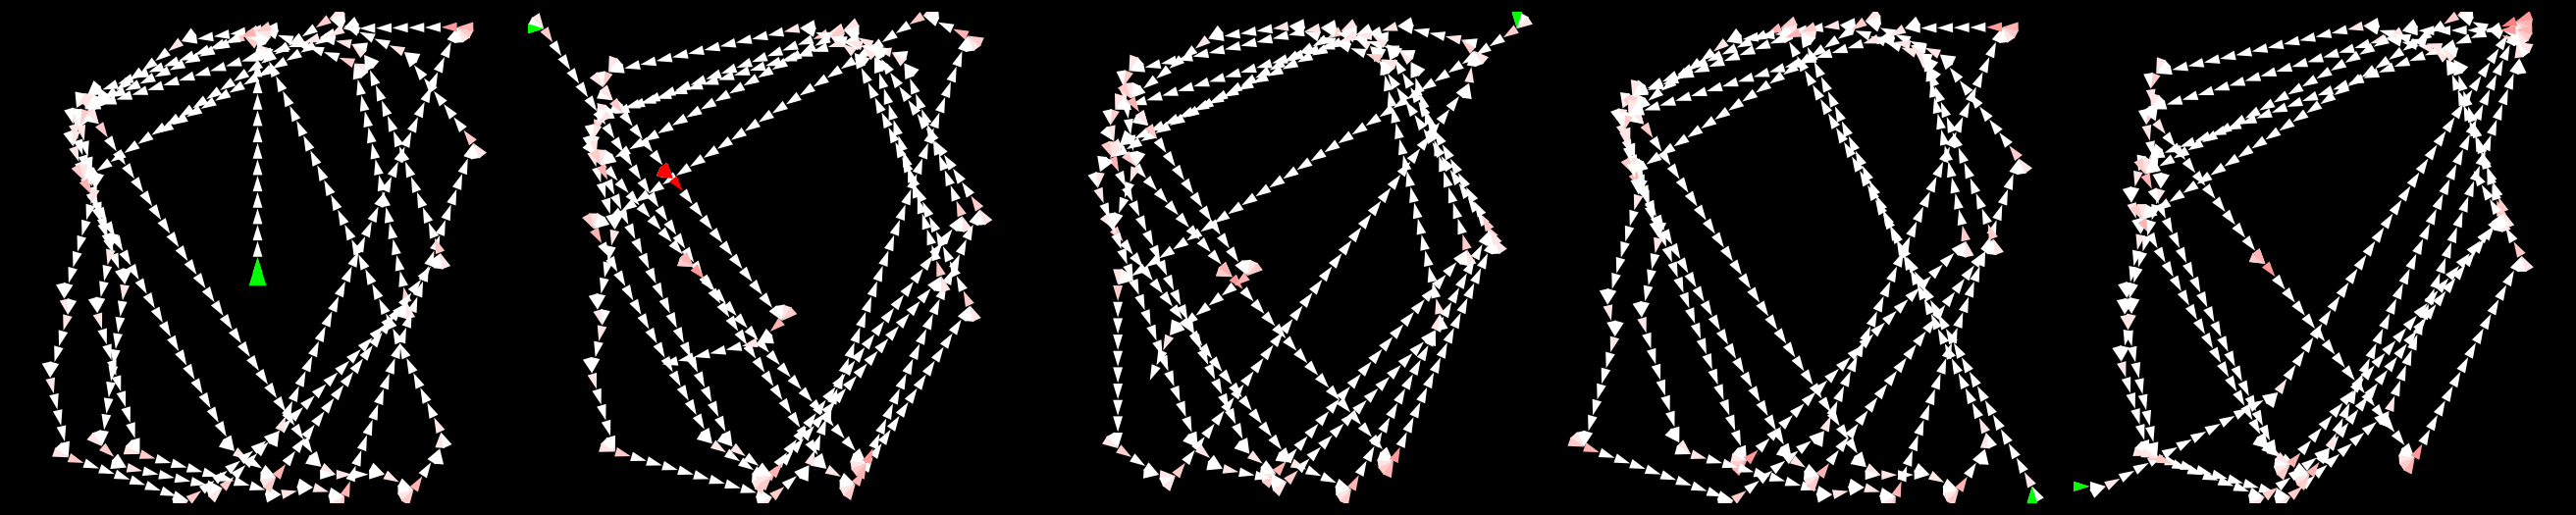

In [58]:
set_trajectory_plot_style()

ep = 0.02
goal = 20
trial = 2

exp_name = f'expl_goalpos_punishbonusep{ep}goal{goal}'    
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/explorenav_pos/{save_file}')

effs, trajs, ress = test_search_efficiency(model, obs_rms, ret_res=True,
                                          env_kwargs={'obs_set': 3})

fig, ax = pplt.subplots(ncols=5)

for i in range(5):
    draw_trajectory(trajs[i][0], trajs[i][1], ax=ax[i])

In [ ]:
obs_sets = [2, 3, 4, 5]
network_sizes = [64, 128, 256]

obs = 3
hidden = 256
trial = 0

for obs in obs_sets:
    for hidden in network_sizes:
        for trial in tqdm(range(3)):
            exp_name = f'explorenav_pos/expl_goalpos_obs{obs}hidden{hidden}'
            save_file = exp_name + f'_t{trial}.pt'
            model, obs_rms = torch.load(f'../saved_models/{save_file}')
            video_folder = f'./video/obs{obs}hidden{hidden}t{trial}'

            env_kwargs = {'rew_structure': 'explorepunish1_explorebonus',
                          'sub_goal_reward': 0.04, 'bonus_multiplier': 5,
                          'explore_punish_arg': 5, 'obs_set': obs}

            res = evaluate(model, obs_rms, env_name='ExploreNav-v0', env_kwargs=env_kwargs,
                           num_episodes=3, capture_video=True, data_callback=nav_data_callback,
                           video_folder=video_folder)
            pickle.dump(res, open(f'{video_folder}/res', 'wb'))

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]C:\Users\14and\anaconda3\lib\site-packages\gym\wrappers\record_video.py:41: UserWarning: WARN: Overwriting existing videos at C:\Users\14and\Desktop\Work\github\ppo_aux\write_and_test\video\obs2hidden64t0 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

# !!Check whether episodes where goal is found and refound the RNN hidden state looks different. Or check whether receiving the goal reached observation makes significant change in RNN

In [59]:
set_trajectory_plot_style()

ep = 0.04
mult = 1
arg = 7
trial = 0

exp_name = f'nav_4wefc_ep{ep}mult{mult}arg{arg}'
save_file = exp_name + f'_t{trial}.pt'
model, obs_rms = torch.load(f'../saved_models/4wefc_punish/{save_file}')

res = evaluate(model, obs_rms, env_name='ExploreNav-v0', num_episodes=10, 
         with_activations=True, data_callback=nav_data_callback)

In [61]:
[np.sum(r) for r in res['rewards']]

[3.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0]

In [30]:
envs = simple_vec_envs(obs_rms, env_kwargs=env_kwargs)

In [31]:
res = evaluate_steps(model, envs, num_steps=100, data_callback=nav_data_callback)

In [33]:
env = envs.envs[0]
env.visited_positions

array([[239.23651845,  97.09652654],
       [239.23651845,  97.09652654],
       [229.81684411, 100.45356917],
       ...,
       [         inf,          inf],
       [         inf,          inf],
       [         inf,          inf]])

In [38]:
visited_distanced = np.full((env.visited_positions.shape[0]), False)

In [39]:
env.visited_positions[visited_distanced]

array([], shape=(0, 2), dtype=float64)

In [43]:
infs = (env.visited_positions == np.inf).all(axis=1)
check_pos = env.visited_positions[~visited_distanced & ~infs]

In [46]:
pos = env.character.pos
check_dists = np.sqrt(np.sum((check_pos - pos)**2, axis=1))

In [22]:
pos = env.character.pos
env.visited_positions[env.visited_idx] = pos.copy()
env.visited_idx += 1

lim_idx = int(np.clip(env.visited_idx-10, 0, np.inf))

if lim_idx > 0:
    dists = env.visited_positions[:lim_idx] - pos
    dist = np.min(np.sum(dists**2, axis=1))
    dist = np.sqrt(dist)

    # This pretty much goes to 0 around dist of 50, which is tuned
    #  to a move speed of 10
    punish = -np.exp(-dist/10) * env.sub_goal_reward


# Explore punish

In [20]:
env_kwargs = {'num_objects': 0, 'rew_structure': 'explorepunish',
              'task_structure': 3, 'wall_colors': 4, 'num_rays': 12, 'fov': 1,
              'character_reset_pos': 1,  'one_hot_obs': True,
              'turn_speed': 0.5, 'move_speed': 10, 'max_steps': 500}
env_kwargs = {'num_objects': 0, 'rew_structure': 'explorepunish1_explorebonus',
              'task_structure': 3, 'wall_colors': 4, 'num_rays': 12, 'fov': 1,
              'character_reset_pos': 1,  'one_hot_obs': True,
              'turn_speed': 0.5, 'move_speed': 10, 'max_steps': 500,
              'bonus_multiplier': 5, 'explore_punish_arg': 5}

In [21]:
env = gym.make('NavEnv-v0', **env_kwargs)
env.reset()
# 

array([0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.66906832, 0.64132893, 0.61992

(array([0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.31967959, 0.24679482, 0.2021

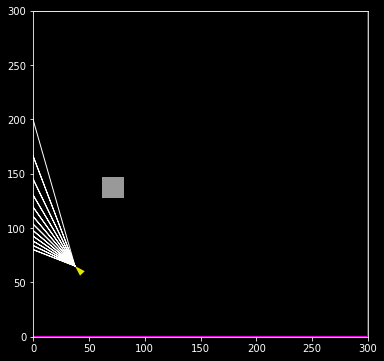

In [68]:
print(env.step(1))
env.render('human')

# Test explore env

In [2]:
env = gym.make('ExploreNav-v0', obs_set='2d', obs_set_arg=5)

In [3]:
env.reset()

array([0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.13264292, 0.13583938, 0.14019

(array([0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.35487335, 0.34606913, 0.3399

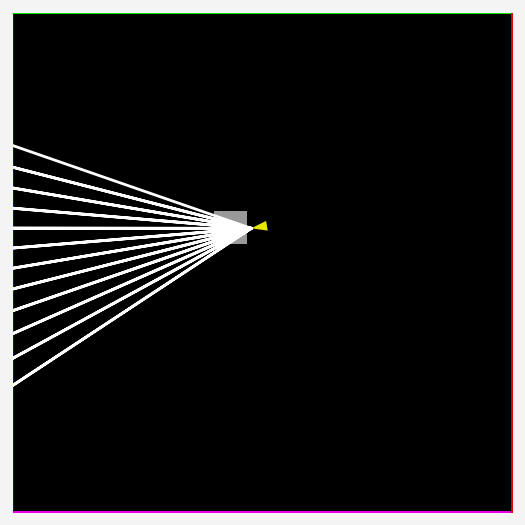

In [23]:
fig, ax = pplt.subplots()
print(env.step(1))
env.render('human', ax=ax)

ax.format(xlim=[0, 300], ylim=[0, 300])

In [72]:
env.character.pos / 300

array([0.21689951, 0.09136692])

# Test shortcut env

In [21]:
env = gym.make('ShortcutNav-v0', shortcut_probability=0.5)

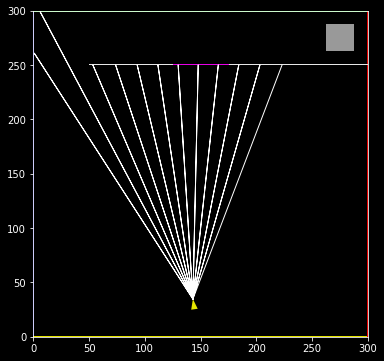

In [30]:

env.reset()
env.render('human')

In [5]:
env.character.ray_dists

array([264.05469338, 273.8630102 , 259.0769037 , 247.43497454,
       238.37763417, 231.51000444, 226.55536371, 223.32585207,
       221.70421464, 221.63309706, 223.11000717, 226.18709902])

In [8]:
char = env.character


In [9]:
fov_start = char.angle - char.fov/2
fov_end = fov_start + char.fov

ray_angles = np.linspace(fov_start, fov_end, char.num_rays, endpoint=False)
ray_mults = np.array([np.cos(ray_angles), np.sin(ray_angles)]).T
ray_ends = ray_mults * char.ray_max_len + char.pos
ray_starts = np.full((char.num_rays, 2), char.pos)

x1 = ray_starts[:, 0].reshape(-1, 1)
y1 = ray_starts[:, 1].reshape(-1, 1)
x2 = ray_ends[:, 0].reshape(-1, 1)
y2 = ray_ends[:, 1].reshape(-1, 1)

#Compute intersect metrics
epsilon = 1e-8
denom = (char.y4-char.y3)*(x2-x1) - (char.x4-char.x3)*(y2-y1) + 1e-8
ua = ((char.x4-char.x3)*(y1-char.y3) - (char.y4-char.y3)*(x1-char.x3)) / denom
ub = ((x2-x1)*(y1-char.y3) - (y2-y1)*(x1-char.x3)) / denom

#Compute x y intersects (they ARE both supposed to be ua)
x = x1 + ua*(x2-x1)
y = y1 + ua*(y2-y1)

#Compute distances to intersects
dists = np.sqrt((x - char.pos[0])**2 + (y - char.pos[1])**2)

#Only keep distances with valid intersects
mults = np.full(x.shape, 1.)
mults[((ua < 0) | (ua > 1) | (ub < 0) | (ub > 1))] = np.inf

#We get np.nan where lines are parallel which throws off the argmin
# Setting parallel to inf should fix the issue
dists[np.isnan(dists)] = np.inf

wall_idxs = np.argmin(mults*dists, axis=1)
wall_idxs2 = np.stack([np.arange(char.num_rays), wall_idxs])

# inter_x = x[wall_idxs2[0], wall_idxs2[1]]
# inter_y = y[wall_idxs2[0], wall_idxs2[1]]


In [11]:
ray_dists = dists[wall_idxs2[0], wall_idxs2[1]]
ray_colors = list(map(lambda x: x.color, char.vis_wall_refs[wall_idxs]))


# Behavior in shortcut

In [170]:
import sys
sys.path.append('../')
from model_evaluation import *
from trajectories import *
from evaluation import *

model, obs_rms = torch.load('../saved_models/shortcuts/shortcutnav_shortcutprob0.4batch32_t0.pt')

res = evaluate(model, obs_rms, num_episodes=5, data_callback=nav_data_callback,
              verbose=2, env_name='ShortcutNav-v0')

C:\Users\14and\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\14and\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ep 0, rew tensor([[1.]])
ep 1, rew tensor([[1.]])
ep 2, rew tensor([[1.]])
ep 3, rew tensor([[1.]])
ep 4, rew tensor([[1.]])
 Evaluation using 0 episodes: mean reward nan



C:\Users\14and\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\14and\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [112]:
model, obs_rms = torch.load('../saved_models/shortcuts/shortcutnav_shortcutprob0.2batch128_t2.pt')

res = evaluate(model, obs_rms, num_episodes=5, data_callback=nav_data_callback,
              verbose=2, env_name='ShortcutNav-v0', env_kwargs={'shortcut_probability': 0})
res2 = evaluate(model, obs_rms, num_episodes=5, data_callback=nav_data_callback,
              verbose=2, env_name='ShortcutNav-v0', env_kwargs={'shortcut_probability': 1})

C:\Users\14and\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\14and\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ep 0, rew tensor([[1.]])
ep 1, rew tensor([[1.]])
ep 2, rew tensor([[1.]])
ep 3, rew tensor([[1.]])
ep 4, rew tensor([[1.]])
 Evaluation using 0 episodes: mean reward nan

ep 0, rew tensor([[1.]])
ep 1, rew tensor([[1.]])


C:\Users\14and\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\14and\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ep 2, rew tensor([[1.]])
ep 3, rew tensor([[1.]])
ep 4, rew tensor([[1.]])
 Evaluation using 0 episodes: mean reward nan



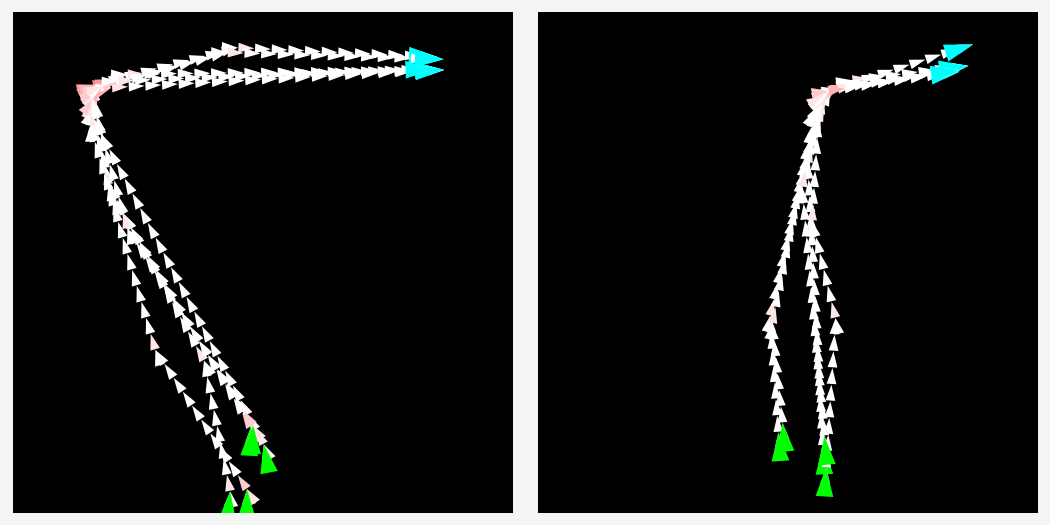

In [113]:
fig, ax = pplt.subplots(ncols=2)

pos = res['data']['pos']
angle = res['data']['angle']

pos2 = res2['data']['pos']
angle2 = res2['data']['angle']

for i in range(5):
    p = pos[i]
    a = angle[i]
    draw_trajectory(p, a,  ax=ax[0])
    
    p = pos2[i]
    a = angle2[i]
    draw_trajectory(p, a,  ax=ax[1])

In [109]:
print(np.mean([len(p) for p in pos]))
print(np.mean([len(p) for p in pos2]))

56.2
37.2


In [36]:
%run gradients

In [45]:
agent, envs, rollouts = initialize_ppo_training(model, obs_rms, 'ShortcutNav-v0', num_steps=100)
actor_critic = agent.actor_critic
res = populate_rollouts_aux(actor_critic, envs, rollouts)

In [46]:
with torch.no_grad():
    next_value = actor_critic.get_value(
        rollouts.obs[-1], rollouts.recurrent_hidden_states[-1],
        rollouts.masks[-1]).detach()

(Figure(nrows=1, ncols=1, refwidth=2.5),
 SubplotGrid(nrows=1, ncols=1, length=1))

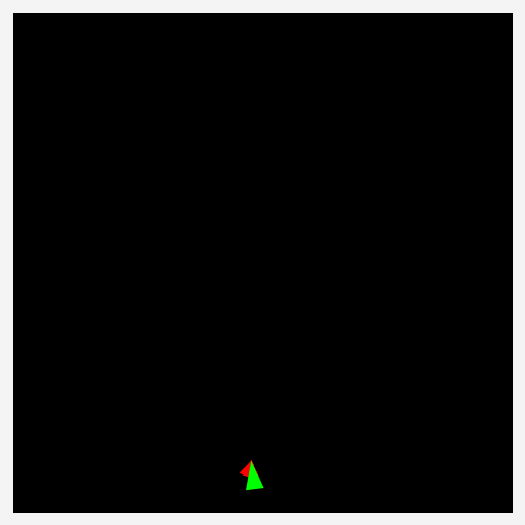

In [21]:
i = 0

pos = res['data']['pos'][i]
angle = res['data']['angle'][i]

draw_trajectory(pos, angle)


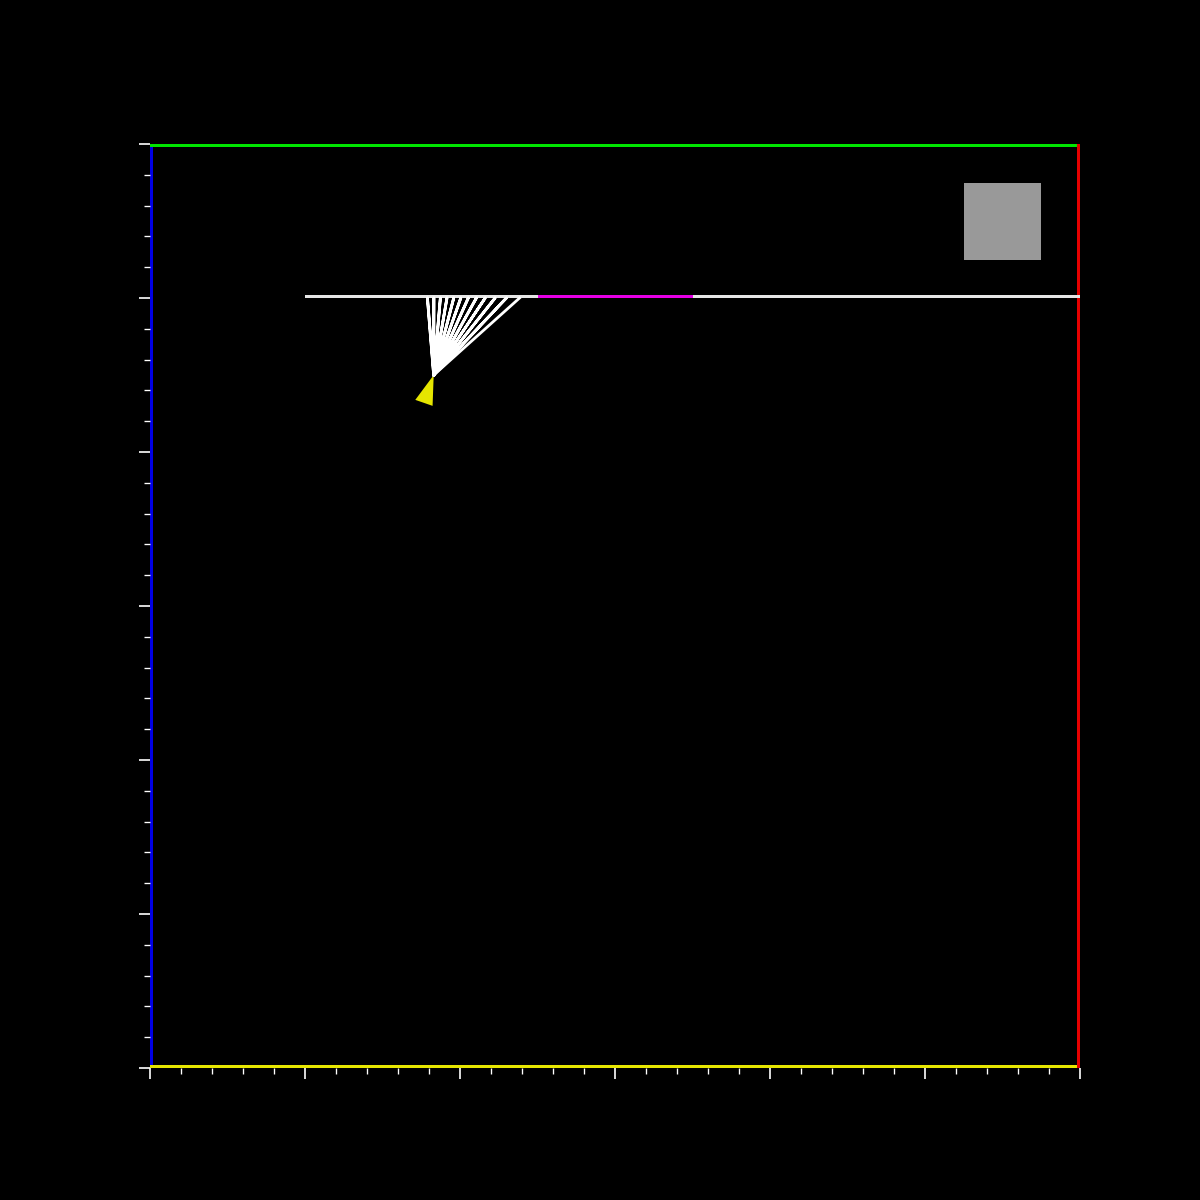

In [64]:
env = gym.make('ShortcutNav-v0', character_reset_pos=3)
env.reset()
env.render('human')